In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
missing_values = ["$","*",np.nan,"?","#","@","+","&&&&"]
data = pd.read_excel("Customer+Churn+Data.xlsx", sheet_name="Data for DSBA",na_values=missing_values)
data.head()

AccountID  Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1     4.0        3.0              6.0   Debit Card  Female   
1      20001      1     0.0        1.0              8.0          UPI    Male   
2      20002      1     0.0        1.0             30.0   Debit Card    Male   
3      20003      1     0.0        3.0             15.0   Debit Card    Male   
4      20004      1     0.0        1.0             12.0  Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
2            2.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   

  Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single            9.0          1.0            11.0   
1         Single            7.0          1.0            15.0   
2         Single            6.0          1.0            14.0   
3         Single            8.0          0.0            23.0   
4         Single            3.0          0.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  
0                      1.0                   5.0    159.93       Mobile  
1                      0.0                   0.0    120.90       Mobile  
2                      0.0                   3.0       NaN       Mobile  
3                      0.0                   3.0    134.07       Mobile  
4                      1.0                   3.0    129.60       Mobile

In [3]:
print(f"We have {data.shape[0]} records and {data.shape[1]} column variables")

We have 11260 records and 19 column variables


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [5]:
## Checking proportion of null values in dataset

def null_values(df):
    return round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

null_values(data)  ## As we can see there are missing values in most of the columns

rev_per_month              7.02
Login_device               6.75
cashback                   4.20
Account_user_count         3.94
Day_Since_CC_connect       3.18
Complain_ly                3.17
Tenure                     1.94
Marital_Status             1.88
CC_Agent_Score             1.03
City_Tier                  0.99
Payment                    0.97
Gender                     0.96
CC_Contacted_LY            0.91
Service_Score              0.87
account_segment            0.86
coupon_used_for_payment    0.03
rev_growth_yoy             0.03
Churn                      0.00
AccountID                  0.00
dtype: float64

In [6]:
print("Shape before dropping blanks: ",data.shape)
df = data.dropna()
print("After dropping blanks: ",df.shape)

Shape before dropping blanks:  (11260, 19)
After dropping blanks:  (8249, 19)


In [7]:
for i in data:
    print(data[i].value_counts(ascending=False))
    print("\n","*"*50)
    print()

20000    1
27510    1
27502    1
27503    1
27504    1
        ..
23754    1
23755    1
23756    1
23757    1
31259    1
Name: AccountID, Length: 11260, dtype: int64

 **************************************************

0    9364
1    1896
Name: Churn, dtype: int64

 **************************************************

1.0     1351
0.0     1231
8.0      519
9.0      496
7.0      450
10.0     423
3.0      410
5.0      403
4.0      403
11.0     388
6.0      363
12.0     360
13.0     359
2.0      354
14.0     345
15.0     311
16.0     291
19.0     273
18.0     253
20.0     217
17.0     215
21.0     170
23.0     169
22.0     151
24.0     147
30.0     137
28.0     137
99.0     131
27.0     131
26.0     122
25.0     114
29.0     114
31.0      96
50.0       2
60.0       2
51.0       2
61.0       2
Name: Tenure, dtype: int64

 **************************************************

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

 **************************************************

In [8]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

unique_value_count = pd.Series(dict)
unique_value_count

AccountID                  11260
Churn                          2
Tenure                        37
City_Tier                      3
CC_Contacted_LY               44
Payment                        5
Gender                         4
Service_Score                  6
Account_user_count             6
account_segment                7
CC_Agent_Score                 5
Marital_Status                 3
rev_per_month                 58
Complain_ly                    2
rev_growth_yoy                19
coupon_used_for_payment       17
Day_Since_CC_connect          23
cashback                    5692
Login_device                   2
dtype: int64

In [9]:
print("Shape before dropping duplicates: ",data.shape)
data.drop_duplicates()
print("After dropping duplicates: ",data.shape)  ### There is no duplicate value found

Shape before dropping duplicates:  (11260, 19)
After dropping duplicates:  (11260, 19)


### UNIVARIATE ANALYSIS

In [10]:
### Describing Numerical Columns

data.describe().T

count          mean          std      min  \
AccountID                11260.0  25629.500000  3250.626350  20000.0   
Churn                    11260.0      0.168384     0.374223      0.0   
Tenure                   11042.0     11.025086    12.879782      0.0   
City_Tier                11148.0      1.653929     0.915015      1.0   
CC_Contacted_LY          11158.0     17.867091     8.853269      4.0   
Service_Score            11162.0      2.902526     0.725584      0.0   
Account_user_count       10816.0      3.692862     1.022976      1.0   
CC_Agent_Score           11144.0      3.066493     1.379772      1.0   
rev_per_month            10469.0      6.362594    11.909686      1.0   
Complain_ly              10903.0      0.285334     0.451594      0.0   
rev_growth_yoy           11257.0     16.193391     3.757721      4.0   
coupon_used_for_payment  11257.0      1.790619     1.969551      0.0   
Day_Since_CC_connect     10902.0      4.633187     3.697637      0.0   
cashback                 10787.0    196.236370   178.660514      0.0   

                              25%       50%       75%      max  
AccountID                22814.75  25629.50  28444.25  31259.0  
Churn                        0.00      0.00      0.00      1.0  
Tenure                       2.00      9.00     16.00     99.0  
City_Tier                    1.00      1.00      3.00      3.0  
CC_Contacted_LY             11.00     16.00     23.00    132.0  
Service_Score                2.00      3.00      3.00      5.0  
Account_user_count           3.00      4.00      4.00      6.0  
CC_Agent_Score               2.00      3.00      4.00      5.0  
rev_per_month                3.00      5.00      7.00    140.0  
Complain_ly                  0.00      0.00      1.00      1.0  
rev_growth_yoy              13.00     15.00     19.00     28.0  
coupon_used_for_payment      1.00      1.00      2.00     16.0  
Day_Since_CC_connect         2.00      3.00      8.00     47.0  
cashback                   147.21    165.25    200.01   1997.0

In [11]:
#Extracting Numeric Columns except AccountID
numeric_columns = list(data.describe().T.index)
numeric_columns.remove('AccountID')
numeric_columns

['Churn',
 'Tenure',
 'City_Tier',
 'CC_Contacted_LY',
 'Service_Score',
 'Account_user_count',
 'CC_Agent_Score',
 'rev_per_month',
 'Complain_ly',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']

In [12]:
### Describing String Columns

data.describe(include="O").T

count unique         top  freq
Payment          11151      5  Debit Card  4587
Gender           11152      4        Male  6328
account_segment  11163      7       Super  4062
Marital_Status   11048      3     Married  5860
Login_device     10500      2      Mobile  7482

<AxesSubplot:>

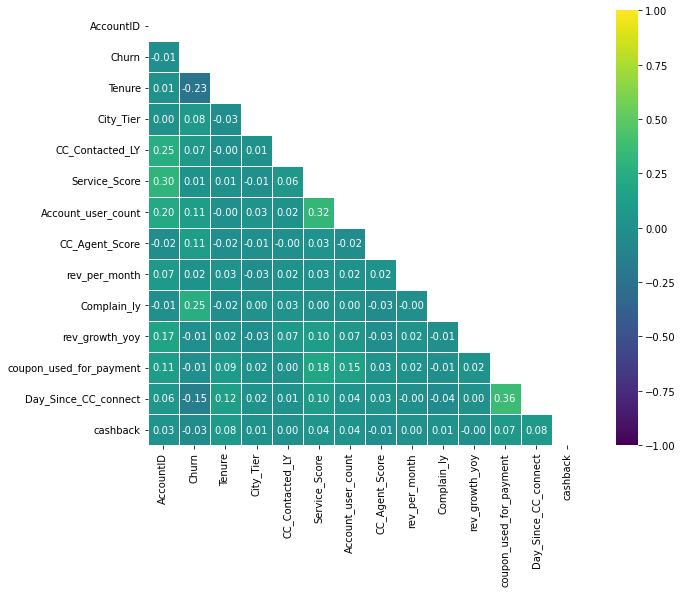

In [13]:
## Analysisng Correlation

plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)

In [14]:
# lets check the percentage of outlier in each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()/data.shape[0]*100),
            columns = ['Outlier %'], index = None). round(2).sort_values(by='Outlier %',ascending=False)

C:\Users\91933\AppData\Local\Temp\ipykernel_11564\2076648069.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  pd.DataFrame((((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()/data.shape[0]*100),


Outlier %
Churn                        16.84
coupon_used_for_payment      12.26
cashback                      7.81
Account_user_count            6.76
rev_per_month                 1.64
Tenure                        1.23
CC_Contacted_LY               0.37
Day_Since_CC_connect          0.29
Service_Score                 0.12
rev_growth_yoy                0.00
account_segment               0.00
AccountID                     0.00
Payment                       0.00
Marital_Status                0.00
Gender                        0.00
Complain_ly                   0.00
City_Tier                     0.00
CC_Agent_Score                0.00
Login_device                  0.00

In [15]:
#checking if the Churn data is balanced or not
data.groupby(["Churn"]).count().T

Churn                       0     1
AccountID                9364  1896
Tenure                   9194  1848
City_Tier                9269  1879
CC_Contacted_LY          9280  1878
Payment                  9277  1874
Gender                   9278  1874
Service_Score            9282  1880
Account_user_count       8986  1830
account_segment          9285  1878
CC_Agent_Score           9270  1874
Marital_Status           9184  1864
rev_per_month            8694  1775
Complain_ly              9065  1838
rev_growth_yoy           9361  1896
coupon_used_for_payment  9361  1896
Day_Since_CC_connect     9070  1832
cashback                 8976  1811
Login_device             8731  1769

In [16]:
# Checking kurtosis and skewness of data
print("Kurtosis & Skewness of dataset is as below:")
pd.DataFrame(data = [data.kurtosis(numeric_only=True), data.skew(numeric_only=True)], index=['Kurtosis','Skewness']).T.round(2)

Kurtosis & Skewness of dataset is as below:


Kurtosis  Skewness
AccountID                   -1.20      0.00
Churn                        1.14      1.77
Tenure                      23.37      3.90
City_Tier                   -1.40      0.74
CC_Contacted_LY              8.23      1.42
Service_Score               -0.67      0.00
Account_user_count           0.59     -0.39
CC_Agent_Score              -1.12     -0.14
rev_per_month               86.96      9.09
Complain_ly                 -1.10      0.95
rev_growth_yoy              -0.22      0.75
coupon_used_for_payment      9.10      2.58
Day_Since_CC_connect         5.33      1.27
cashback                    81.11      8.77

<Figure size 864x504 with 0 Axes>

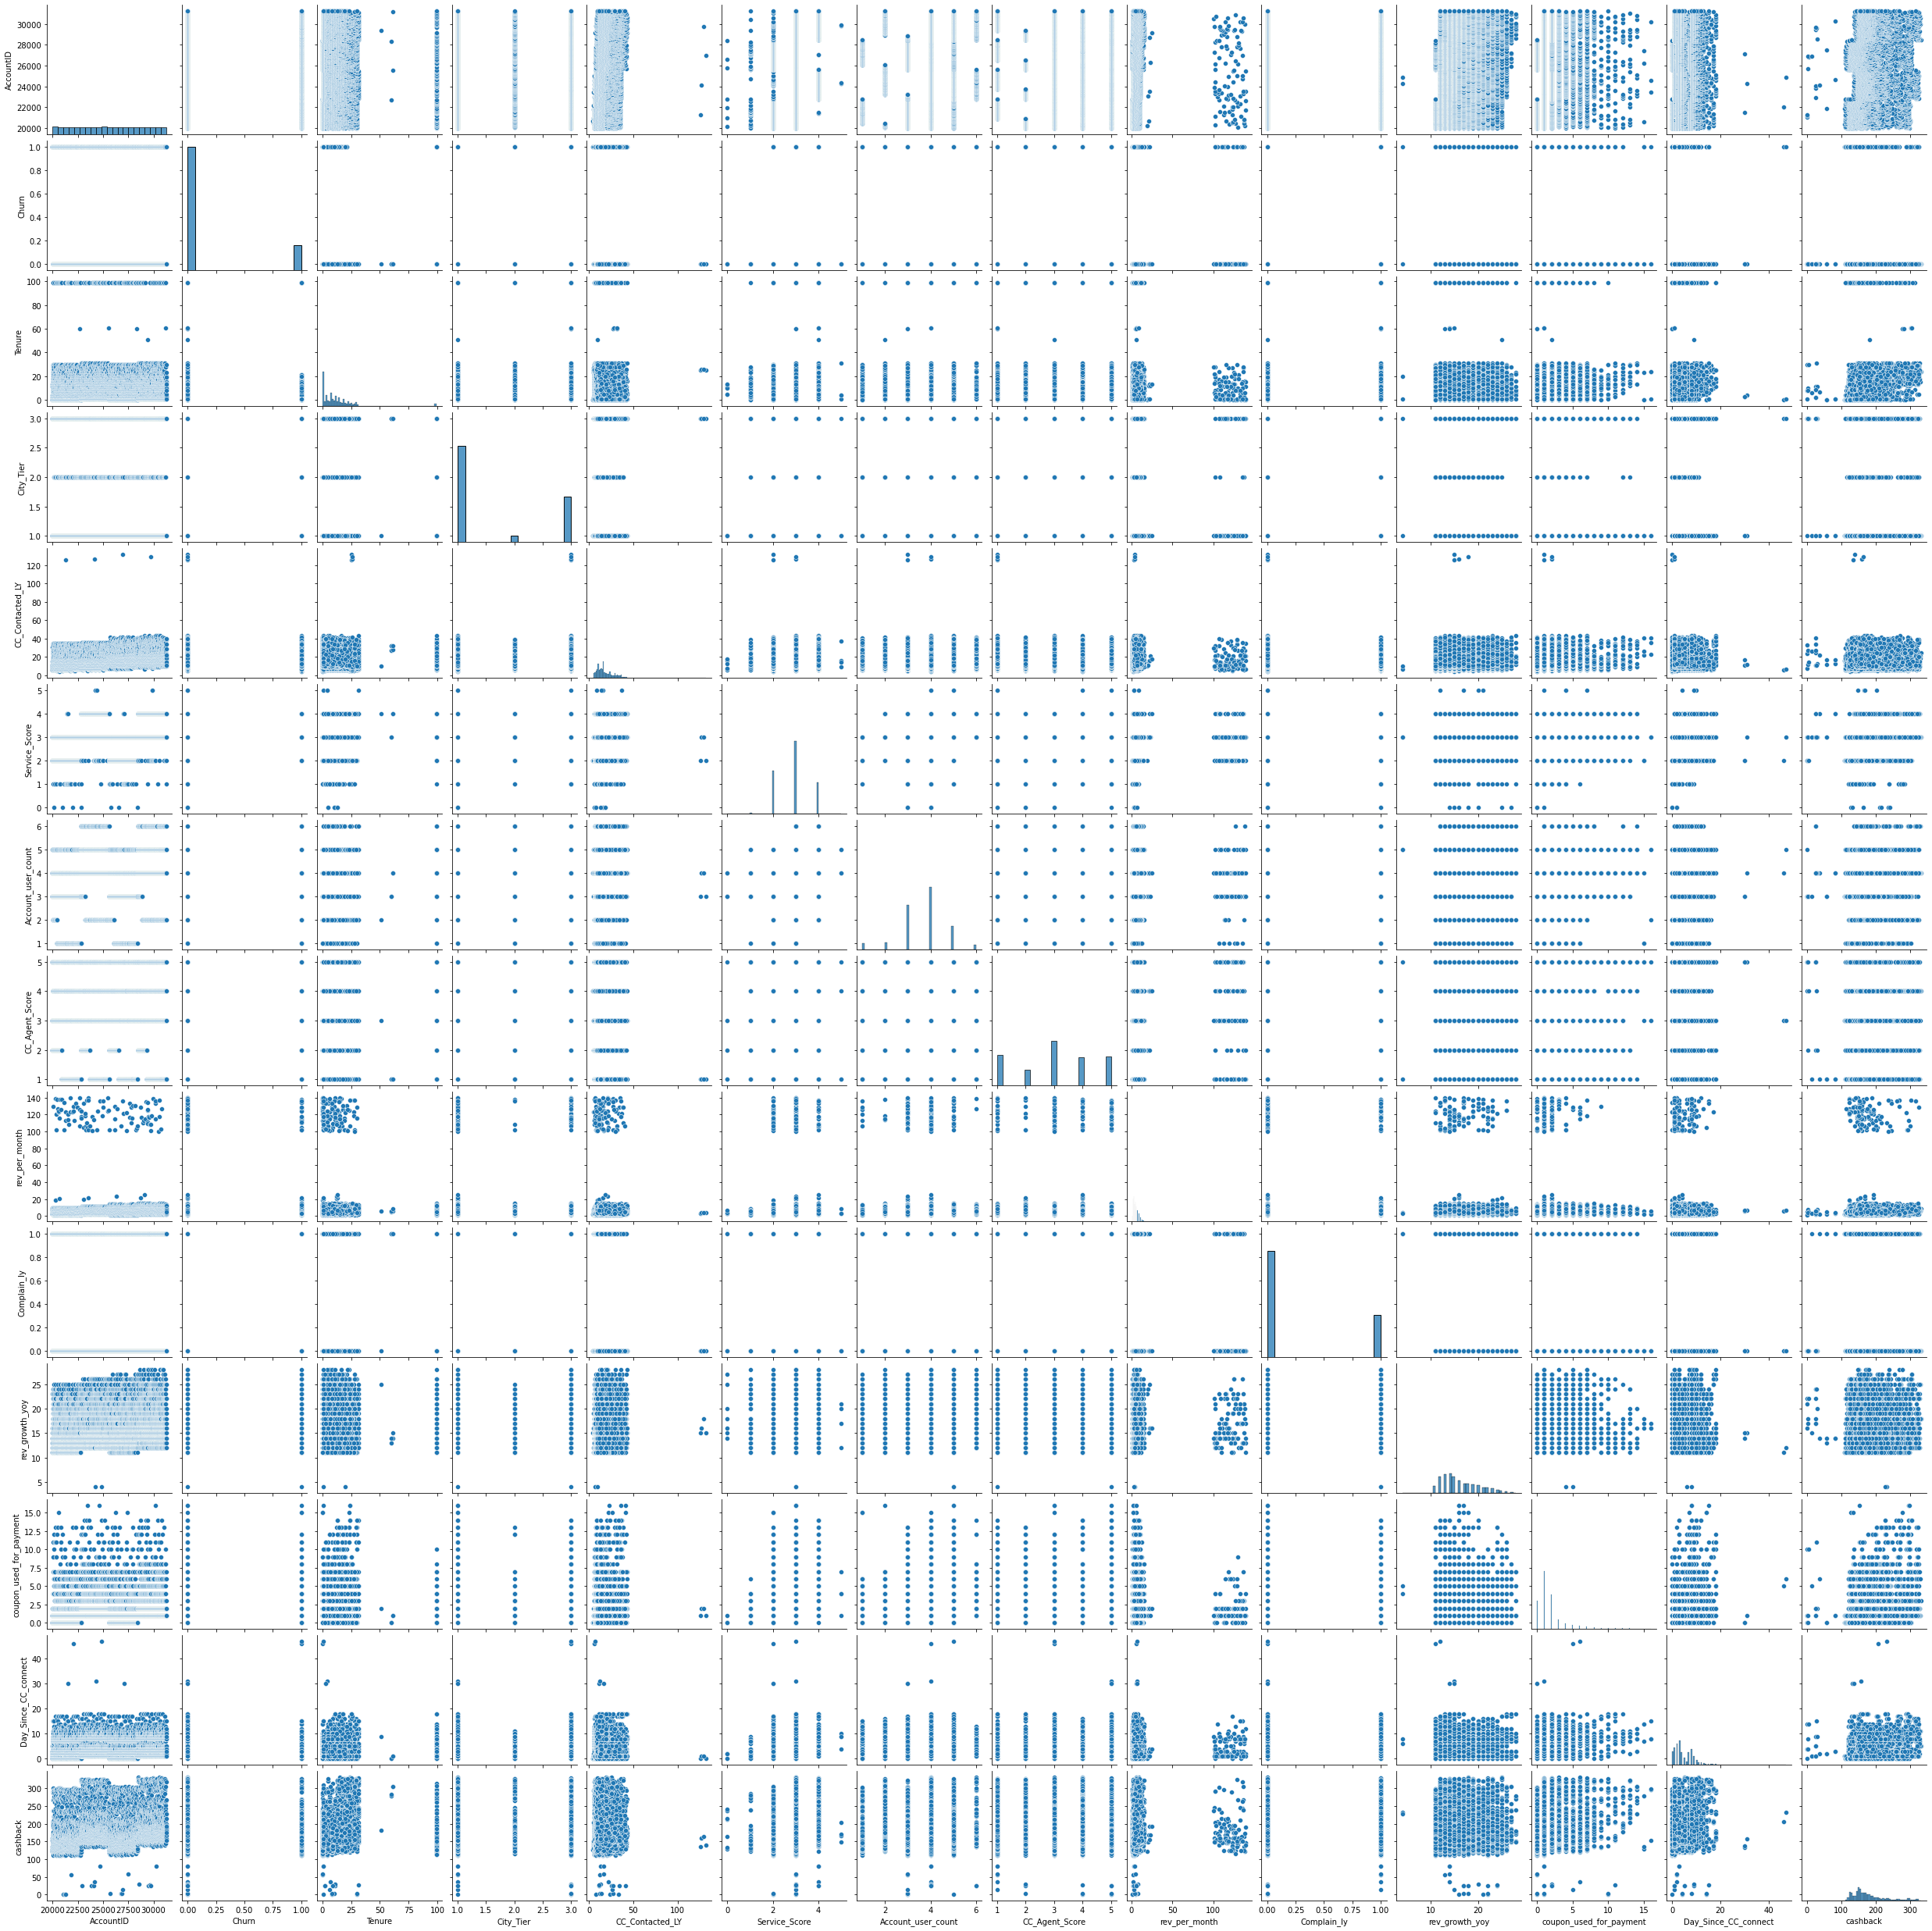

In [17]:
plt.figure(figsize=(12,7))
sns.pairplot(df)
plt.show()

In [18]:
#Checking if the data is balanced or not
data.groupby(["Churn"]).count().T

Churn                       0     1
AccountID                9364  1896
Tenure                   9194  1848
City_Tier                9269  1879
CC_Contacted_LY          9280  1878
Payment                  9277  1874
Gender                   9278  1874
Service_Score            9282  1880
Account_user_count       8986  1830
account_segment          9285  1878
CC_Agent_Score           9270  1874
Marital_Status           9184  1864
rev_per_month            8694  1775
Complain_ly              9065  1838
rev_growth_yoy           9361  1896
coupon_used_for_payment  9361  1896
Day_Since_CC_connect     9070  1832
cashback                 8976  1811
Login_device             8731  1769

In [19]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))

### Uni-Variate Analysis

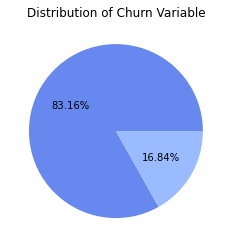

In [20]:
## Distribution of Churn (Target) variable

plt.title("Distribution of Churn Variable")
palette_color = sns.color_palette('coolwarm')
plt.pie(data['Churn'].value_counts(), colors=palette_color, autopct='%.2f%%')
plt.show()

In [21]:
## Extracting columns where unique values are less than 10
categorical_cols = unique_value_count[unique_value_count<=10].index.to_list()
categorical_cols

['Churn',
 'City_Tier',
 'Payment',
 'Gender',
 'Service_Score',
 'Account_user_count',
 'account_segment',
 'CC_Agent_Score',
 'Marital_Status',
 'Complain_ly',
 'Login_device']

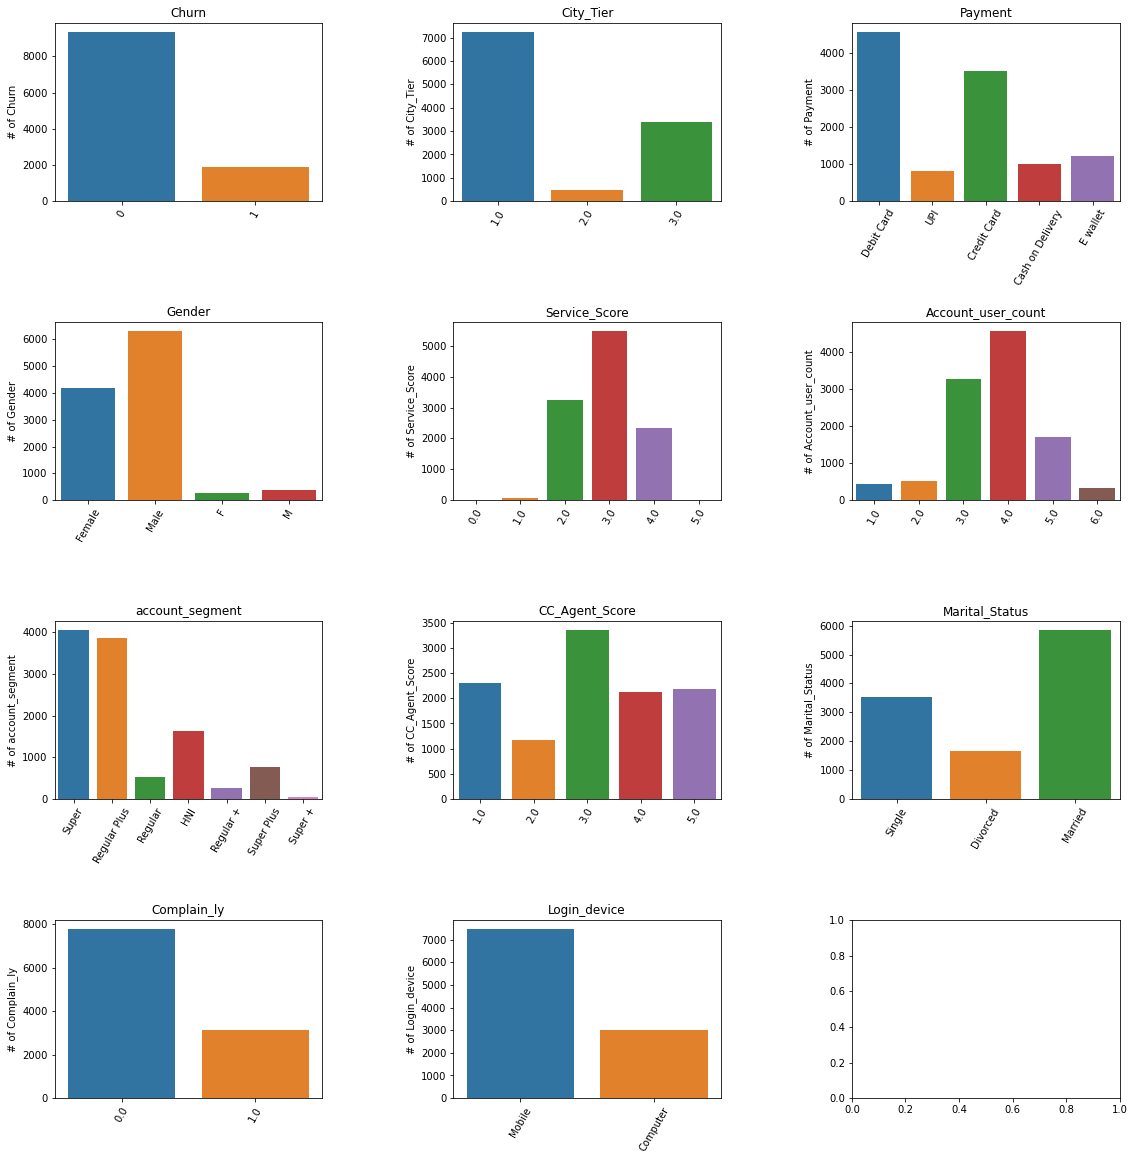

In [22]:
fig, axes = plt.subplots(4,3,figsize=(18,18))
fig.tight_layout(pad=10)

for col,ax in zip(categorical_cols, axes.ravel()):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
    ax.set(title=col,ylabel=f"# of {col}",xlabel="")

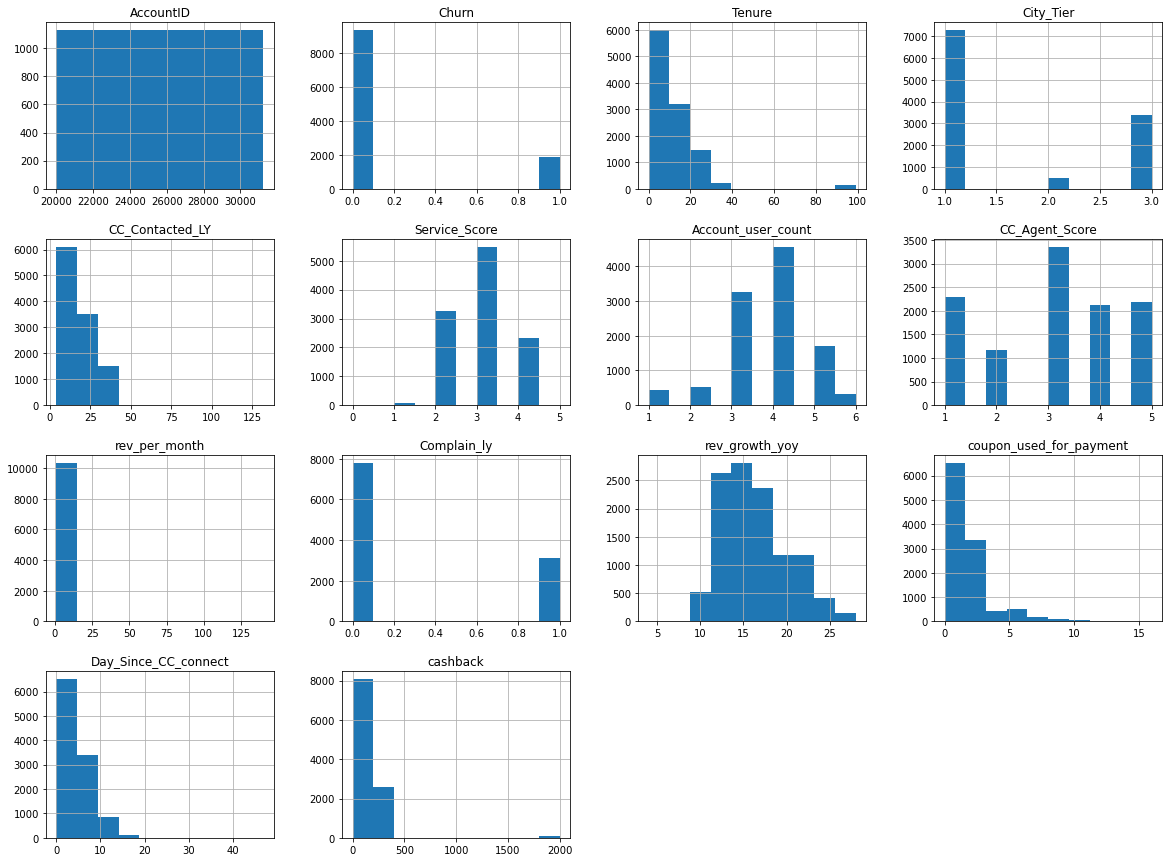

In [23]:
#Histogram for all the continuous variables
data.hist(figsize=(20,15));

### Bi-variate & Multi-variate Analysis

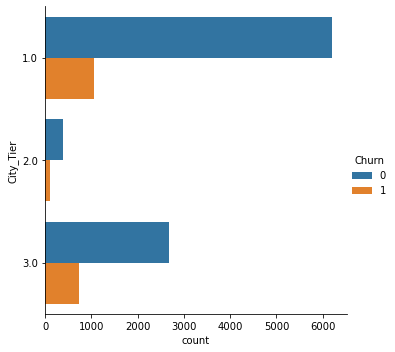

In [24]:
sns.catplot(y="City_Tier", hue="Churn", kind="count", data=data)

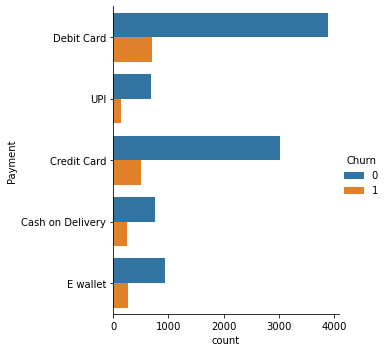

In [25]:
sns.catplot(y="Payment", hue="Churn", kind="count", data=data)

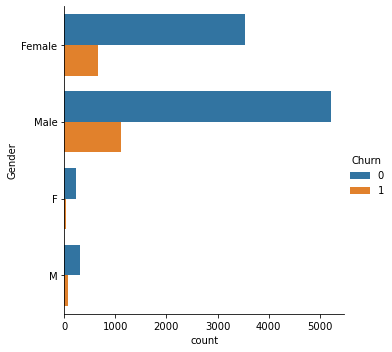

In [26]:
sns.catplot(y="Gender", hue="Churn", kind="count", data=data)

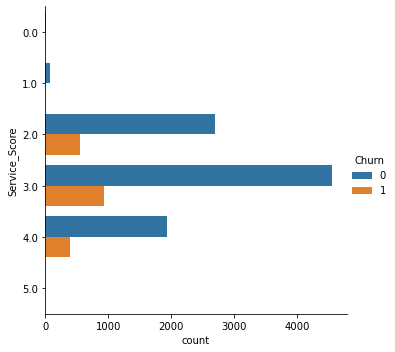

In [27]:
sns.catplot(y="Service_Score", hue="Churn", kind="count", data=data)

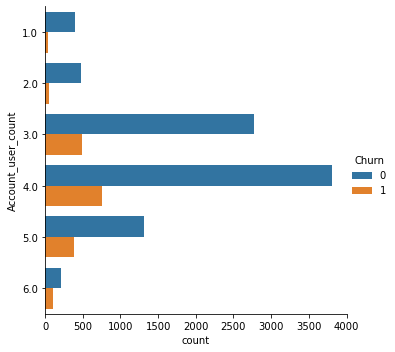

In [28]:
sns.catplot(y="Account_user_count", hue="Churn", kind="count", data=data)

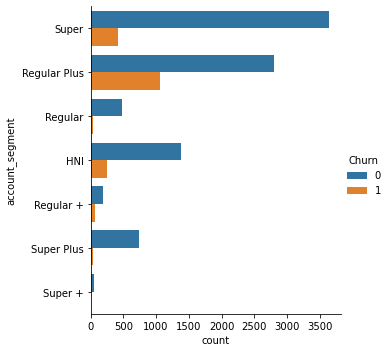

In [29]:
sns.catplot(y="account_segment", hue="Churn", kind="count", data=data)

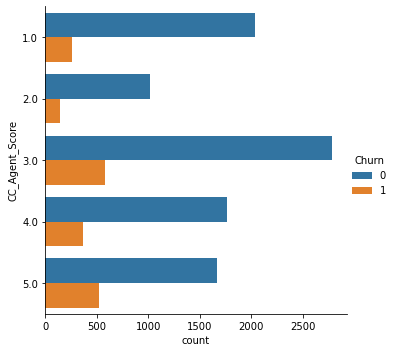

In [30]:
sns.catplot(y="CC_Agent_Score", hue="Churn", kind="count", data=data)

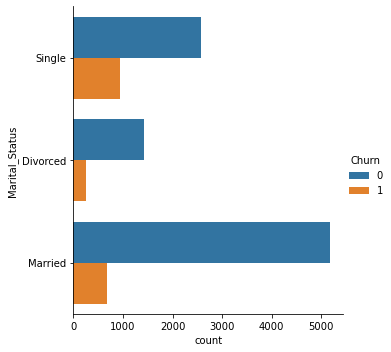

In [31]:
sns.catplot(y="Marital_Status", hue="Churn", kind="count", data=data)

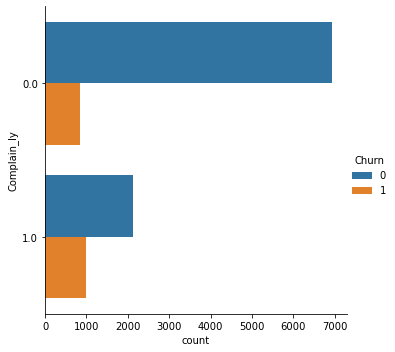

In [32]:
sns.catplot(y="Complain_ly", hue="Churn", kind="count", data=data)

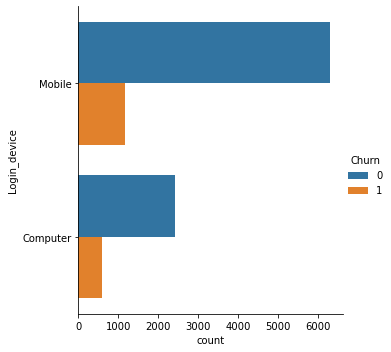

In [33]:
sns.catplot(y="Login_device", hue="Churn", kind="count", data=data)

### MISSING VALUE IMPUTATION OF EACH VARIABLE

In [34]:
df = data.copy()

In [35]:
## VAR: Churn

df.Churn.value_counts(dropna=False)

0    9364
1    1896
Name: Churn, dtype: int64

In [36]:
## VAR: Tenure (As data falls between 0-99, imputed with Median)

df['Tenure']=df['Tenure'].fillna(df['Tenure'].median())
df.Tenure.isnull().sum()

0

In [37]:
## VAR: City_Tier (being Categorical. imputed with Mode)

df['City_Tier']=df['City_Tier'].fillna(df['City_Tier'].mode()[0])
df.City_Tier.isnull().sum()

0

In [38]:
## VAR: CC_Contacted_LY (imputed with Mean)

df['CC_Contacted_LY']=df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].mean())
df.CC_Contacted_LY.isnull().sum()

0

In [39]:
## VAR: Payment (imputed with Mode)

df['Payment']=df['Payment'].fillna(df['Payment'].mode()[0])
df.Payment.isnull().sum()

0

In [40]:
print(df["Gender"].unique())

df['Gender'] = df['Gender'].replace('Female','F')
df['Gender'] = df['Gender'].replace('Male','M')

print(df["Gender"].unique())

['Female' 'Male' 'F' nan 'M']
['F' 'M' nan]


In [41]:
## VAR: Gender (imputed with Mode)

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df.Gender.isnull().sum()

0

In [42]:
## VAR: Service_Score (imputed with Mode)

df['Service_Score']=df['Service_Score'].fillna(df['Service_Score'].mode()[0])
df.Service_Score.isnull().sum()

0

In [43]:
## VAR: Service_Score (imputed with Median)

df['Account_user_count']=df['Account_user_count'].fillna(df['Account_user_count'].median())
df.Account_user_count.isnull().sum()

0

In [44]:
print(df["account_segment"].unique())

df['account_segment'] = df['account_segment'].replace('Regular Plus','Regular +')
df['account_segment'] = df['account_segment'].replace('Super Plus','Super +')

print(df["account_segment"].unique())

['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']
['Super' 'Regular +' 'Regular' 'HNI' nan 'Super +']


In [45]:
## VAR: account_segment (imputed with Mode)

df['account_segment']=df['account_segment'].fillna(df['account_segment'].mode()[0])
df.account_segment.isnull().sum()

0

In [46]:
## VAR: CC_Agent_Score (imputed with Mode)

df['CC_Agent_Score']=df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mode()[0])
df.CC_Agent_Score.isnull().sum()

0

In [47]:
## VAR: Marital_Status (imputed with Mode)

df['Marital_Status']=df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])
df.Marital_Status.isnull().sum()

0

In [48]:
## VAR: rev_per_month (imputed with Median)

df['rev_per_month']=df['rev_per_month'].fillna(df['rev_per_month'].median())
df.rev_per_month.isnull().sum()

0

In [49]:
## VAR: Complain_ly (imputed with Mode)

df['Complain_ly']=df['Complain_ly'].fillna(df['Complain_ly'].mode()[0])
df.Complain_ly.isnull().sum()

0

In [50]:
## VAR: rev_growth_yoy (imputed with Median)

df['rev_growth_yoy']=df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median())
df.rev_growth_yoy.isnull().sum()

0

In [51]:
## VAR: coupon_used_for_payment (imputed with Median)

df['coupon_used_for_payment']=df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].median())
df.coupon_used_for_payment.isnull().sum()

0

In [52]:
## VAR: Day_Since_CC_connect (imputed with Median)

df['Day_Since_CC_connect']=df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median())
df.Day_Since_CC_connect.isnull().sum()

0

In [53]:
## VAR: cashback (imputed with Median)

df['cashback']=df['cashback'].fillna(df['cashback'].median())
df.cashback.isnull().sum()

0

In [54]:
## VAR: Login_device (imputed with Mode)

df['Login_device']=df['Login_device'].fillna(df['Login_device'].mode()[0])
df.Login_device.isnull().sum()

0

In [55]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [56]:
# Import label encoder 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [57]:
# Encode labels in column 'Payment'. 
df['Payment']= label_encoder.fit_transform(df['Payment'])   
df['Payment'].unique() 

array([2, 4, 1, 0, 3])

In [58]:
# Encode labels in column 'Gender'. 
df['Gender']= label_encoder.fit_transform(df['Gender'])   
df['Gender'].unique() 

array([0, 1])

In [59]:
# Encode labels in column 'account_segment'. 
df['account_segment']= label_encoder.fit_transform(df['account_segment'])   
df['account_segment'].unique() 

array([3, 2, 1, 0, 4])

In [60]:
# Encode labels in column 'Marital_Status'. 
df['Marital_Status']= label_encoder.fit_transform(df['Marital_Status'])   
df['Marital_Status'].unique() 

array([2, 0, 1])

In [61]:
# Encode labels in column 'Login_device'. 
df['Login_device']= label_encoder.fit_transform(df['Login_device'])   
df['Login_device'].unique() 

array([1, 0])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  float64
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  int32  
 6   Gender                   11260 non-null  int32  
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  float64
 9   account_segment          11260 non-null  int32  
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  int32  
 12  rev_per_month            11260 non-null  float64
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

### OUTLIER TREATMENT

In [63]:
df1=df.copy()

In [64]:
# lets check the percentage of outlier in each column
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()/df1.shape[0]*100),
            columns = ['Outlier %'], index = None). round(2).sort_values(by='Outlier %',ascending=False)

Outlier %
Churn                        16.84
account_segment              14.56
coupon_used_for_payment      12.26
cashback                      8.76
Payment                       7.30
Account_user_count            6.76
rev_per_month                 1.64
Tenure                        1.23
Day_Since_CC_connect          1.15
CC_Contacted_LY               0.37
Service_Score                 0.12
Complain_ly                   0.00
rev_growth_yoy                0.00
AccountID                     0.00
Marital_Status                0.00
CC_Agent_Score                0.00
Gender                        0.00
City_Tier                     0.00
Login_device                  0.00

In [65]:
# Treating outlier, continuous variables only

def impute_outlier(data,col):
    sorted(data[col])
    Q1,Q3=data[col].quantile([0.25,0.75])
    IQR=Q3-Q1
    up= Q1-(1.5 * IQR)
    lw= Q3+(1.5 * IQR)

    data[col]=np.where(data[col]<up,up,data[col])
    data[col]=np.where(data[col]>lw,lw,data[col])
    
    #return lw,up

In [66]:
impute_outlier(df1,'Tenure')
impute_outlier(df1,'CC_Contacted_LY')
impute_outlier(df1,'Account_user_count')
impute_outlier(df1,'cashback')
impute_outlier(df1,'rev_per_month')
impute_outlier(df1,'Day_Since_CC_connect')
impute_outlier(df1,'coupon_used_for_payment')
impute_outlier(df1,'rev_growth_yoy')

In [67]:
df1.describe()

AccountID         Churn        Tenure     City_Tier  CC_Contacted_LY  \
count  11260.00000  11260.000000  11260.000000  11260.000000     11260.000000   
mean   25629.50000      0.168384     10.251421      1.647425        17.831922   
std     3250.62635      0.374223      8.888905      0.912763         8.562382   
min    20000.00000      0.000000      0.000000      1.000000         4.000000   
25%    22814.75000      0.000000      2.000000      1.000000        11.000000   
50%    25629.50000      0.000000      9.000000      1.000000        16.000000   
75%    28444.25000      0.000000     16.000000      3.000000        23.000000   
max    31259.00000      1.000000     37.000000      3.000000        41.000000   

            Payment        Gender  Service_Score  Account_user_count  \
count  11260.000000  11260.000000   11260.000000        11260.000000   
mean       1.762167      0.604973       2.903375            3.710790   
std        1.007789      0.488878       0.722476            0.924278   
min        0.000000      0.000000       0.000000            1.500000   
25%        1.000000      0.000000       2.000000            3.000000   
50%        2.000000      1.000000       3.000000            4.000000   
75%        2.000000      1.000000       3.000000            4.000000   
max        4.000000      1.000000       5.000000            5.500000   

       account_segment  CC_Agent_Score  Marital_Status  rev_per_month  \
count     11260.000000    11260.000000    11260.000000   11260.000000   
mean          2.168739        3.065808        1.164476       5.250799   
std           1.118655        1.372663        0.658583       2.879616   
min           0.000000        1.000000        0.000000       1.000000   
25%           2.000000        2.000000        1.000000       3.000000   
50%           2.000000        3.000000        1.000000       5.000000   
75%           3.000000        4.000000        2.000000       7.000000   
max           4.000000        5.000000        2.000000      13.000000   

        Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
count  11260.000000    11260.000000             11260.000000   
mean       0.276288       16.193073                 1.475311   
std        0.447181        3.757271                 1.102248   
min        0.000000        4.000000                 0.000000   
25%        0.000000       13.000000                 1.000000   
50%        0.000000       15.000000                 1.000000   
75%        1.000000       19.000000                 2.000000   
max        1.000000       28.000000                 3.500000   

       Day_Since_CC_connect      cashback  Login_device  
count          11260.000000  11260.000000  11260.000000  
mean               4.546270    177.284260      0.731972  
std                3.493493     43.573285      0.442952  
min                0.000000     73.760000      0.000000  
25%                2.000000    147.890000      0.000000  
50%                3.000000    165.250000      1.000000  
75%                7.000000    197.310000      1.000000  
max               14.500000    271.440000      1.000000

###### After Outlier Treatment

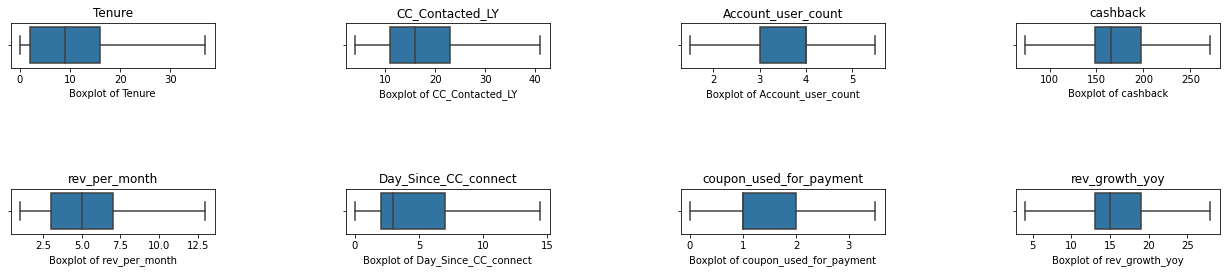

In [68]:
treated_columns=['Tenure','CC_Contacted_LY','Account_user_count','cashback','rev_per_month','Day_Since_CC_connect','coupon_used_for_payment','rev_growth_yoy']

fig, axes = plt.subplots(2,4,figsize=(20,6))
fig.tight_layout(pad=10)

for col,ax in zip(treated_columns, axes.ravel()):
    sns.boxplot(data=df1, x=col, ax=ax)
    ax.set(title=col,xlabel=f"Boxplot of {col}",ylabel="")

### NORMALISATION SCALING

In [69]:
scaled_data = df1.copy()

for col in scaled_data.columns:
    scaled_data[col]=scaled_data[col].astype('int64')

scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   AccountID                11260 non-null  int64
 1   Churn                    11260 non-null  int64
 2   Tenure                   11260 non-null  int64
 3   City_Tier                11260 non-null  int64
 4   CC_Contacted_LY          11260 non-null  int64
 5   Payment                  11260 non-null  int64
 6   Gender                   11260 non-null  int64
 7   Service_Score            11260 non-null  int64
 8   Account_user_count       11260 non-null  int64
 9   account_segment          11260 non-null  int64
 10  CC_Agent_Score           11260 non-null  int64
 11  Marital_Status           11260 non-null  int64
 12  rev_per_month            11260 non-null  int64
 13  Complain_ly              11260 non-null  int64
 14  rev_growth_yoy           11260 non-null  int64
 15  co

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaled_data['Tenure'] = MinMaxScaler().fit_transform(scaled_data[['Tenure']])
scaled_data['City_Tier'] = MinMaxScaler().fit_transform(scaled_data[['City_Tier']])
scaled_data['CC_Contacted_LY'] = MinMaxScaler().fit_transform(scaled_data[['CC_Contacted_LY']])
scaled_data['Payment'] = MinMaxScaler().fit_transform(scaled_data[['Payment']])
scaled_data['Gender'] = MinMaxScaler().fit_transform(scaled_data[['Gender']])
scaled_data['Service_Score'] = MinMaxScaler().fit_transform(scaled_data[['Service_Score']])
scaled_data['Account_user_count'] = MinMaxScaler().fit_transform(scaled_data[['Account_user_count']])
scaled_data['account_segment'] = MinMaxScaler().fit_transform(scaled_data[['account_segment']])
scaled_data['CC_Agent_Score'] = MinMaxScaler().fit_transform(scaled_data[['CC_Agent_Score']])
scaled_data['Marital_Status'] = MinMaxScaler().fit_transform(scaled_data[['Marital_Status']])
scaled_data['rev_per_month'] = MinMaxScaler().fit_transform(scaled_data[['rev_per_month']])
scaled_data['Complain_ly'] = MinMaxScaler().fit_transform(scaled_data[['Complain_ly']])
scaled_data['rev_growth_yoy'] = MinMaxScaler().fit_transform(scaled_data[['rev_growth_yoy']])
scaled_data['coupon_used_for_payment'] = MinMaxScaler().fit_transform(scaled_data[['coupon_used_for_payment']])
scaled_data['Day_Since_CC_connect'] = MinMaxScaler().fit_transform(scaled_data[['Day_Since_CC_connect']])
scaled_data['cashback'] = MinMaxScaler().fit_transform(scaled_data[['cashback']])
scaled_data['Login_device'] = MinMaxScaler().fit_transform(scaled_data[['Login_device']])

In [71]:
## Dropping Account_ID
scaled_data = scaled_data.drop(axis=1,columns='AccountID')

In [72]:
print(scaled_data.std())

Churn                      0.374223
Tenure                     0.240241
City_Tier                  0.456381
CC_Contacted_LY            0.231426
Payment                    0.251947
Gender                     0.488878
Service_Score              0.144495
Account_user_count         0.238165
account_segment            0.279664
CC_Agent_Score             0.343166
Marital_Status             0.329292
rev_per_month              0.239968
Complain_ly                0.447181
rev_growth_yoy             0.156553
coupon_used_for_payment    0.332277
Day_Since_CC_connect       0.248387
cashback                   0.220109
Login_device               0.442952
dtype: float64


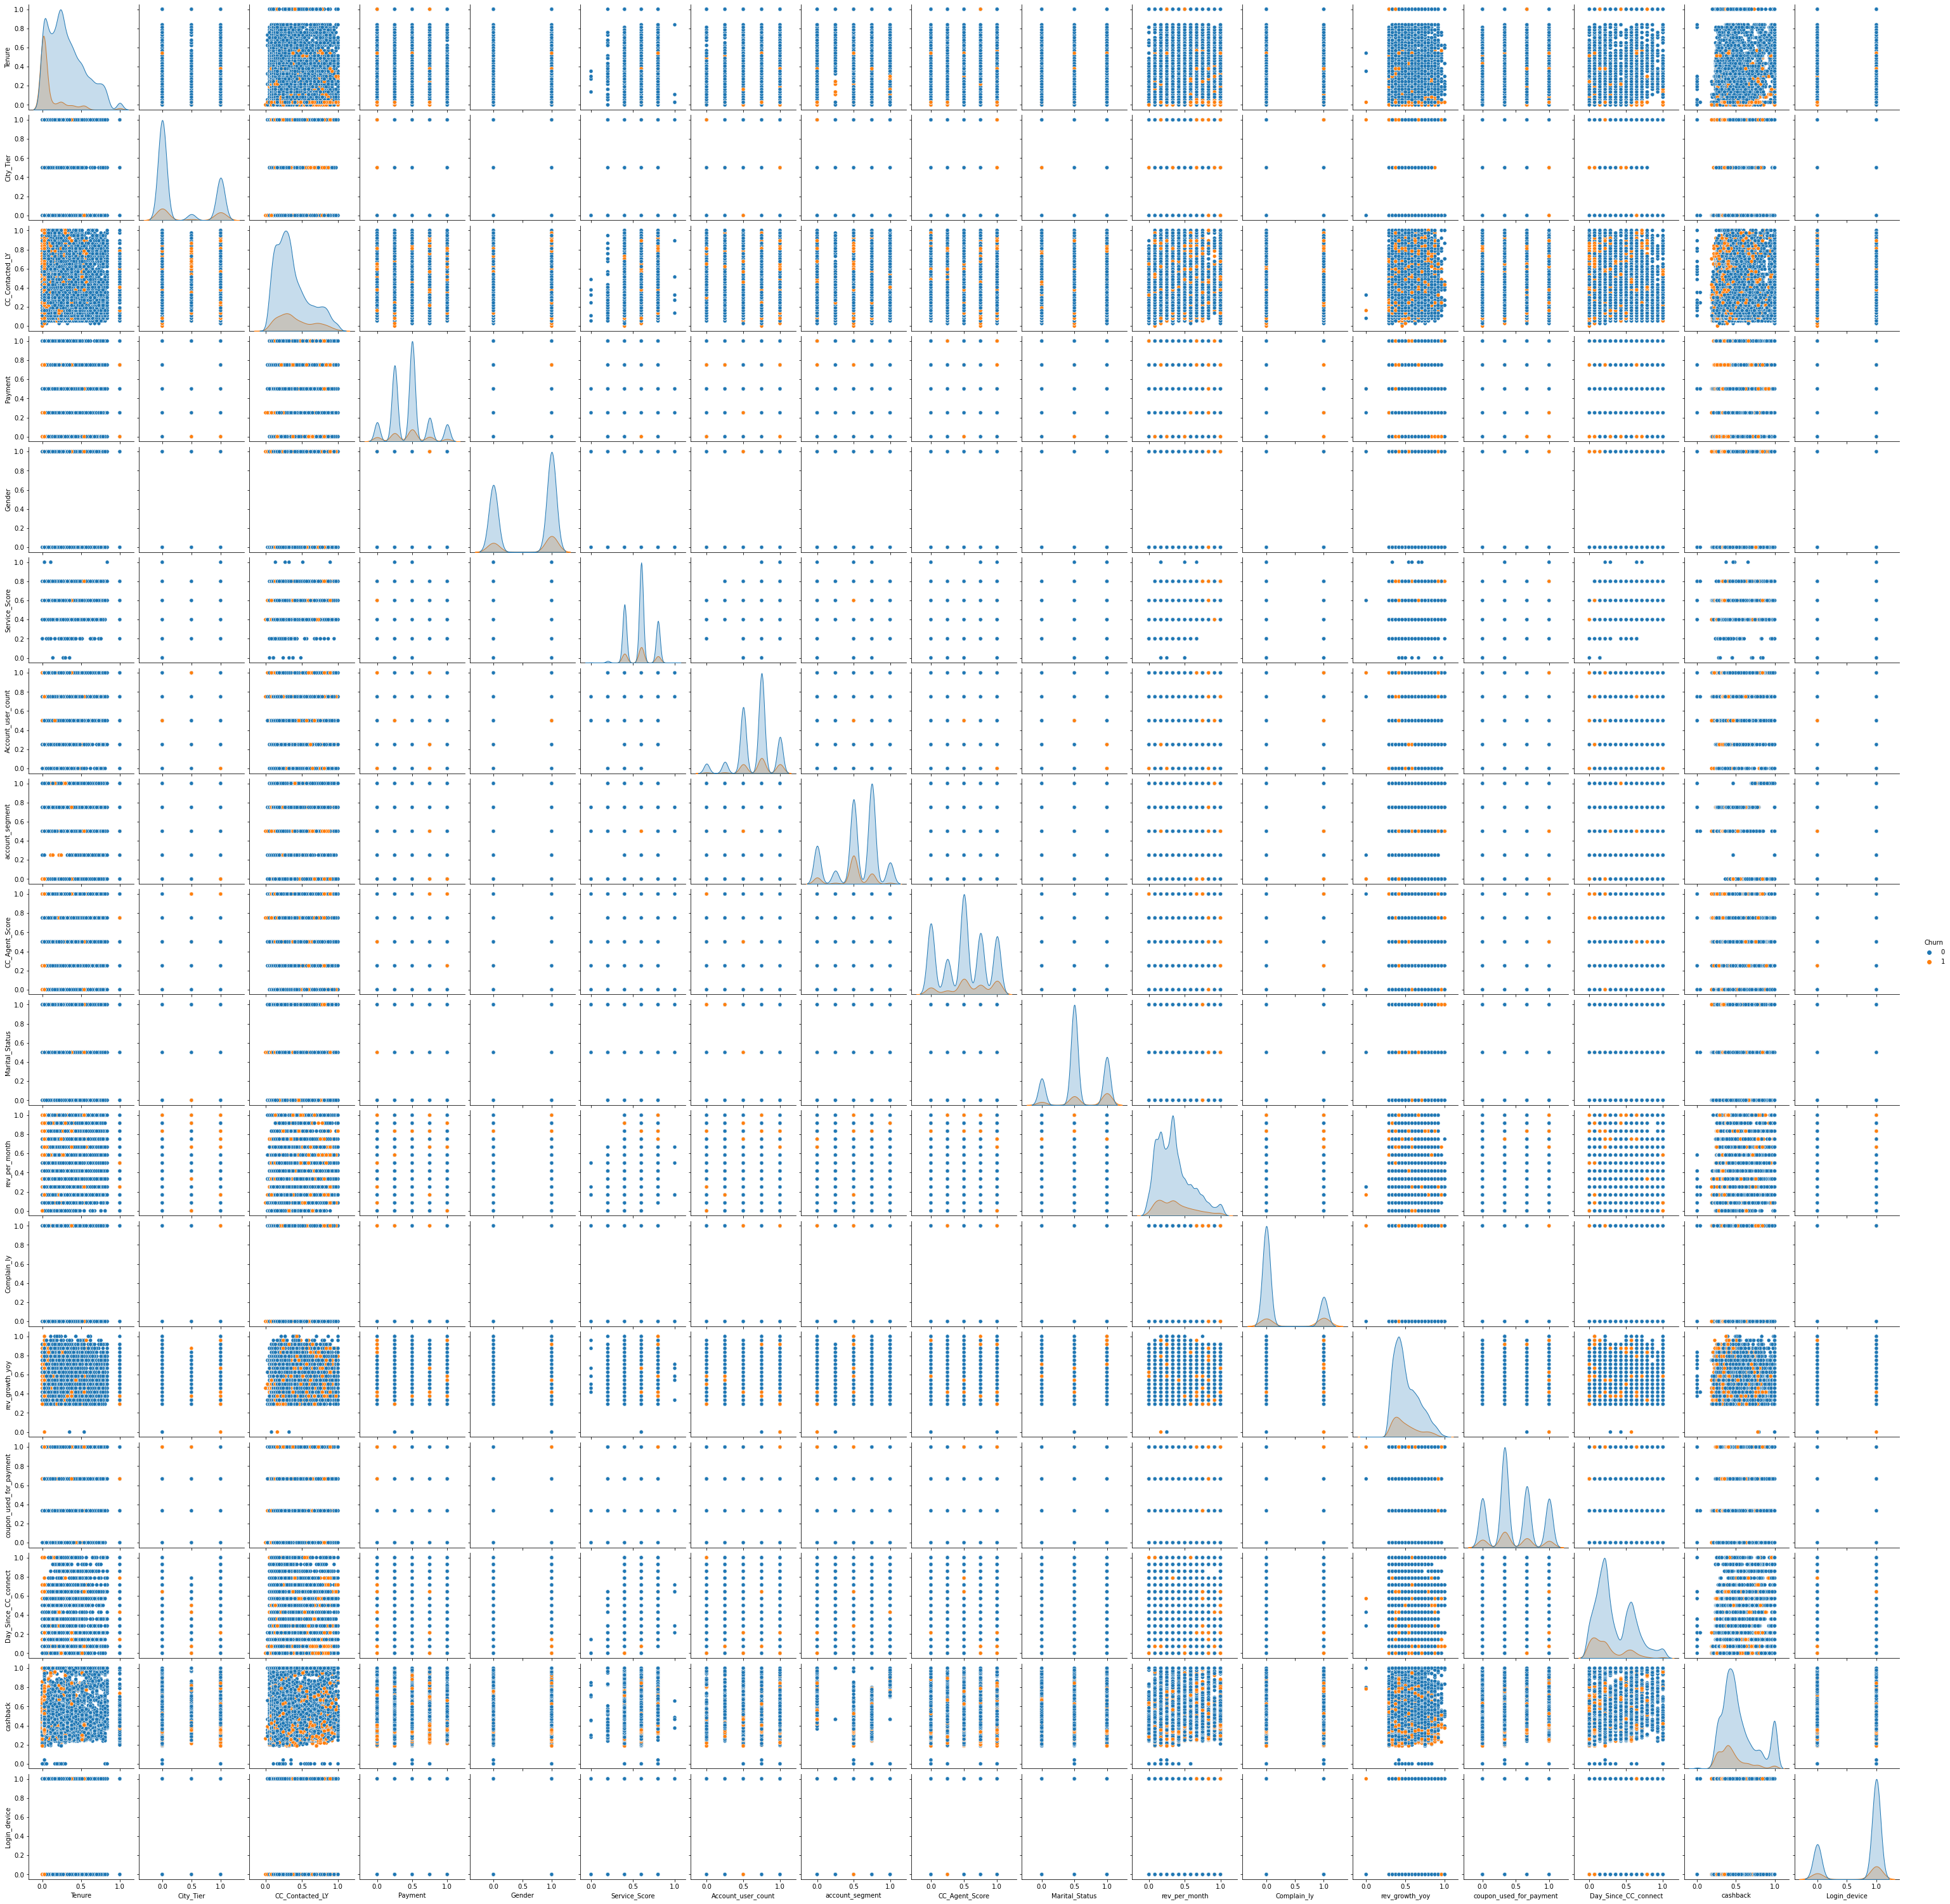

In [73]:
# Plotting Pairplot on scaled data

sns.pairplot(scaled_data, hue = 'Churn', diag_kind='kde')
plt.show()

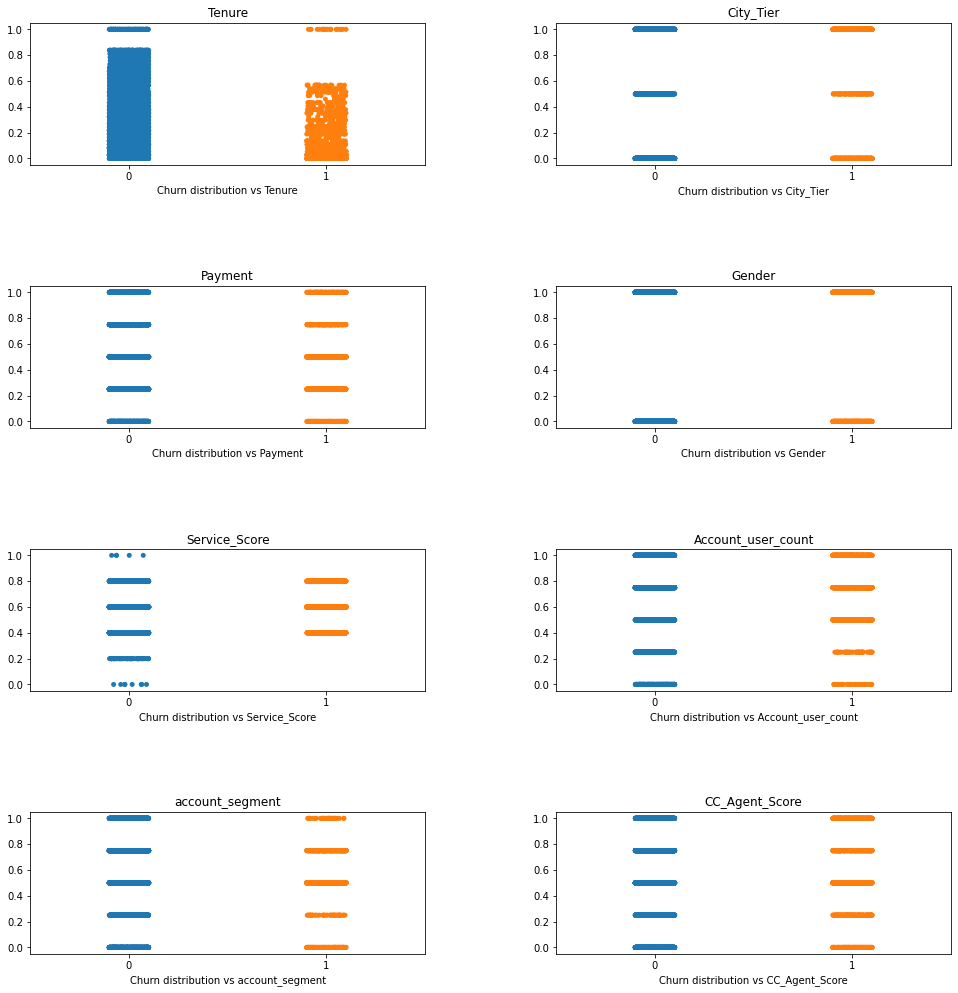

In [74]:
strip_cols = ['Tenure','City_Tier','Payment','Gender','Service_Score','Account_user_count','account_segment','CC_Agent_Score']

fig, axes = plt.subplots(4,2,figsize=(16,16))
fig.tight_layout(pad=10)

for col,ax in zip(strip_cols, axes.ravel()):
    sns.stripplot(data=scaled_data, x='Churn', y=col, ax=ax)
    ax.set(title=col,xlabel=f"Churn distribution vs {col}",ylabel="")

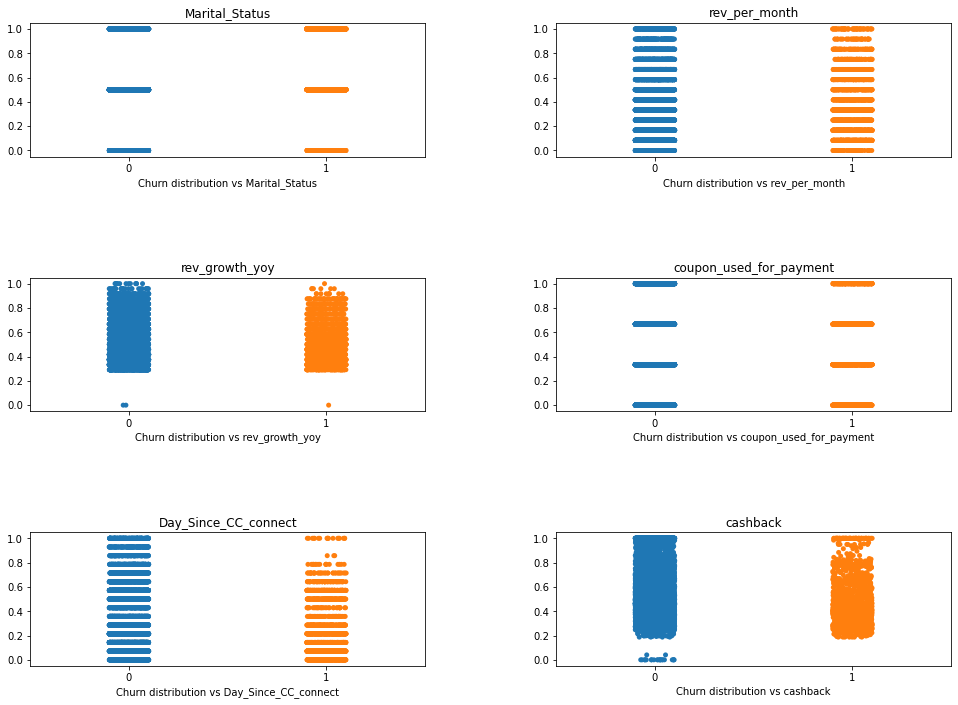

In [75]:
strip_cols = ['Marital_Status','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']

fig, axes = plt.subplots(3,2,figsize=(16,12))
fig.tight_layout(pad=10)

for col,ax in zip(strip_cols, axes.ravel()):
    sns.stripplot(data=scaled_data, x='Churn', y=col, ax=ax)
    ax.set(title=col,xlabel=f"Churn distribution vs {col}",ylabel="")

In [76]:
scaled_data['Payment'] = scaled_data['Payment'].astype('int64')
scaled_data['Gender'] = scaled_data['Gender'].astype('int64')
scaled_data['Service_Score'] = scaled_data['Service_Score'].astype('int64')
scaled_data['Account_user_count'] = scaled_data['Account_user_count'].astype('int64')
scaled_data['account_segment'] = scaled_data['account_segment'].astype('int64')
scaled_data['CC_Agent_Score'] = scaled_data['CC_Agent_Score'].astype('int64')
scaled_data['rev_per_month'] = scaled_data['rev_per_month'].astype('int64')
scaled_data['coupon_used_for_payment'] = scaled_data['coupon_used_for_payment'].astype('int64')
scaled_data['Day_Since_CC_connect'] = scaled_data['Day_Since_CC_connect'].astype('int64')
scaled_data['cashback'] = scaled_data['cashback'].astype('int64')
scaled_data['Marital_Status'] = scaled_data['Marital_Status'].astype('int64')
scaled_data['Complain_ly'] = scaled_data['Complain_ly'].astype('int64')
scaled_data['rev_growth_yoy'] = scaled_data['rev_growth_yoy'].astype('int64')
scaled_data['Login_device'] = scaled_data['Login_device'].astype('int64')
scaled_data['Tenure'] = scaled_data['Tenure'].astype('int64')
scaled_data['City_Tier'] = scaled_data['City_Tier'].astype('int64')
scaled_data['CC_Contacted_LY'] = scaled_data['CC_Contacted_LY'].astype('int64')

In [77]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Churn                    11260 non-null  int64
 1   Tenure                   11260 non-null  int64
 2   City_Tier                11260 non-null  int64
 3   CC_Contacted_LY          11260 non-null  int64
 4   Payment                  11260 non-null  int64
 5   Gender                   11260 non-null  int64
 6   Service_Score            11260 non-null  int64
 7   Account_user_count       11260 non-null  int64
 8   account_segment          11260 non-null  int64
 9   CC_Agent_Score           11260 non-null  int64
 10  Marital_Status           11260 non-null  int64
 11  rev_per_month            11260 non-null  int64
 12  Complain_ly              11260 non-null  int64
 13  rev_growth_yoy           11260 non-null  int64
 14  coupon_used_for_payment  11260 non-null  int64
 15  Da

## Splitting Data intoTrain and Test Datasets

In [78]:
#Splitting data into independent and dependent variables
X = scaled_data.drop('Churn' , axis=1)
y = scaled_data["Churn"]

In [79]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 11260 entries, 0 to 11259
Series name: Churn
Non-Null Count  Dtype
--------------  -----
11260 non-null  int64
dtypes: int64(1)
memory usage: 88.1 KB


In [80]:
#Splitting data into train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [81]:
#Checking the dimentsions of training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7882, 17)
X_test (3378, 17)
y_train (7882,)
y_test (3378,)


#### SMOTE TO HANDLE INBALANCED DATA

In [82]:
#!pip install imblearn

from imblearn.over_sampling import SMOTE 
from collections import Counter

#Applying smote to train dataset and resampling
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [83]:
#checking the dimentsions of training and test data
print('X_train_res',X_train_res.shape)
print('y_train_res',y_train_res.shape)

X_train_res (13112, 17)
y_train_res (13112,)


In [84]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.975], flip_y=0, random_state=1)
counter=Counter(y)
counter

Counter({0: 975, 1: 25})

In [85]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [86]:
counter=Counter(y)
counter

Counter({0: 975, 1: 975})

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882 entries, 7580 to 235
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   7882 non-null   int64
 1   City_Tier                7882 non-null   int64
 2   CC_Contacted_LY          7882 non-null   int64
 3   Payment                  7882 non-null   int64
 4   Gender                   7882 non-null   int64
 5   Service_Score            7882 non-null   int64
 6   Account_user_count       7882 non-null   int64
 7   account_segment          7882 non-null   int64
 8   CC_Agent_Score           7882 non-null   int64
 9   Marital_Status           7882 non-null   int64
 10  rev_per_month            7882 non-null   int64
 11  Complain_ly              7882 non-null   int64
 12  rev_growth_yoy           7882 non-null   int64
 13  coupon_used_for_payment  7882 non-null   int64
 14  Day_Since_CC_connect     7882 non-null   int64
 15  ca

In [88]:
X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13112 entries, 0 to 13111
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   13112 non-null  int64
 1   City_Tier                13112 non-null  int64
 2   CC_Contacted_LY          13112 non-null  int64
 3   Payment                  13112 non-null  int64
 4   Gender                   13112 non-null  int64
 5   Service_Score            13112 non-null  int64
 6   Account_user_count       13112 non-null  int64
 7   account_segment          13112 non-null  int64
 8   CC_Agent_Score           13112 non-null  int64
 9   Marital_Status           13112 non-null  int64
 10  rev_per_month            13112 non-null  int64
 11  Complain_ly              13112 non-null  int64
 12  rev_growth_yoy           13112 non-null  int64
 13  coupon_used_for_payment  13112 non-null  int64
 14  Day_Since_CC_connect     13112 non-null  int64
 15  ca

## Building Logistic Regression Model

In [89]:
# building Logistic regression model
# Fit the model on original data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Fit the Logistic Regression model
lg = LogisticRegression(random_state=1)
lg.fit(X_train, y_train)

# predict on train and test data set
ytrain_predict_lg = lg.predict(X_train) # can compare with y_train
ytest_predict_lg = lg.predict(X_test) # can compare with y_test

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

# confusion matrix for train data set
print("Confusion Matrix for train dataset")
print(confusion_matrix(y_train, ytrain_predict_lg))

# confusion matrix for test data set
print("Confusion Matrix for test dataset")
print(confusion_matrix(y_test, ytest_predict_lg))

Confusion Matrix for train dataset
[[6446  110]
 [1117  209]]
Confusion Matrix for test dataset
[[2749   59]
 [ 478   92]]


In [91]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [92]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_lg))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6556
           1       0.66      0.16      0.25      1326

    accuracy                           0.84      7882
   macro avg       0.75      0.57      0.58      7882
weighted avg       0.82      0.84      0.80      7882



In [93]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lg))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2808
           1       0.61      0.16      0.26       570

    accuracy                           0.84      3378
   macro avg       0.73      0.57      0.58      3378
weighted avg       0.81      0.84      0.80      3378



AUC score and ROC curve for training dataset
AUC: 0.754


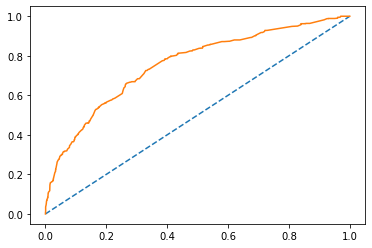

In [94]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.754


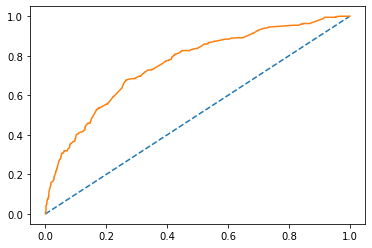

In [95]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Logistic Regression (using SMOTE)

In [96]:
#fitting model into training dataset
lg.fit(X_train_res, y_train_res)

# predict on train and test data set with balanced dataset
ytrain_predict_lgsm = lg.predict(X_train_res) # can compare with y_train
ytest_predict_lgsm = lg.predict(X_test) # can compare with y_test

In [97]:
# confusion matrix for train dataset
print("Confusion matrix for train dataset")
print(confusion_matrix(y_train_res, ytrain_predict_lgsm))

# confusion matrix for test dataset
print("Confusion matrix for test dataset")
print(confusion_matrix(y_test, ytest_predict_lgsm))

Confusion matrix for train dataset
[[4508 2048]
 [1975 4581]]
Confusion matrix for test dataset
[[1912  896]
 [ 168  402]]


In [98]:
# getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_lgsm))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      6556
           1       0.69      0.70      0.69      6556

    accuracy                           0.69     13112
   macro avg       0.69      0.69      0.69     13112
weighted avg       0.69      0.69      0.69     13112



In [99]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lgsm))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      2808
           1       0.31      0.71      0.43       570

    accuracy                           0.69      3378
   macro avg       0.61      0.69      0.61      3378
weighted avg       0.82      0.69      0.72      3378



AUC score and ROC curve for training dataset
AUC: 0.755


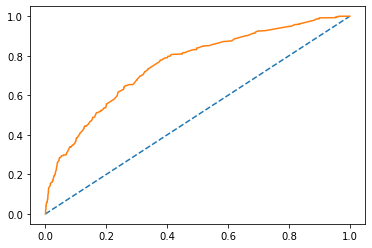

In [100]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.754


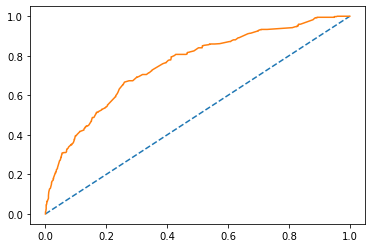

In [101]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Building KNN Model 

In [102]:
# building KNN model using the default hyper-parameter
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

## Performance Matrix on train data set
ytrain_predict_knn = knn.predict(X_train)
ytest_predict_knn = knn.predict(X_test)

In [103]:
print("confusion matrix of training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_knn))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_knn))

confusion matrix of training dataset
[[6128  428]
 [ 809  517]]
confusion matrix for testing dataset
[[2557  251]
 [ 367  203]]


In [104]:
print("classificatoin report of training dataset")
print (classification_report(y_train, ytrain_predict_knn))

classificatoin report of training dataset
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6556
           1       0.55      0.39      0.46      1326

    accuracy                           0.84      7882
   macro avg       0.72      0.66      0.68      7882
weighted avg       0.83      0.84      0.83      7882



In [105]:
print("classsification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_knn))

classsification report for testing dataset
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2808
           1       0.45      0.36      0.40       570

    accuracy                           0.82      3378
   macro avg       0.66      0.63      0.64      3378
weighted avg       0.80      0.82      0.81      3378



AUC score and ROC curve for training dataset
AUC: 0.765


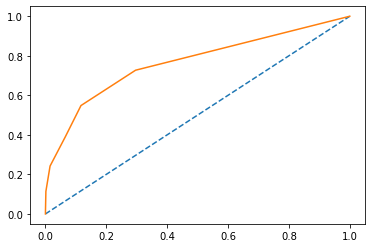

In [106]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.733


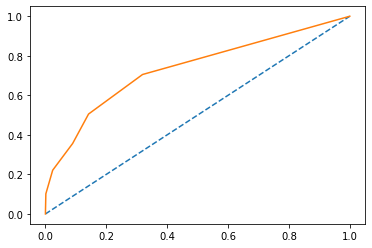

In [107]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Finding the right value for n_neighbor

In [108]:
# getting the ideal number of value of "N"
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.21906453522794556,
 0.20189461219656601,
 0.18294849023090587,
 0.17791592658377742,
 0.17821195973949078,
 0.17406749555950263,
 0.15660153937240973,
 0.15719360568383656,
 0.15808170515097686,
 0.15245707519242158]

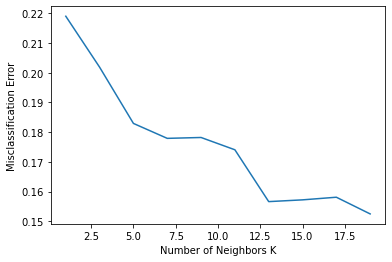

In [109]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### Applying KNN with 5 neighbours

In [110]:
#from sklearn.neighbors import KNeighborsClassifier

knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)

ytrain_predict_knn5 = knn5.predict(X_train)
ytest_predict_knn5 = knn5.predict(X_test)

In [111]:
print("confusion matrix for training dataset")
print(confusion_matrix(y_train, ytrain_predict_knn5))

print("confusion matrix for testing dataset")
print(confusion_matrix(y_test, ytest_predict_knn5))

confusion matrix for training dataset
[[6128  428]
 [ 809  517]]
confusion matrix for testing dataset
[[2557  251]
 [ 367  203]]


In [112]:
print("classification report for training dataset")
print(classification_report(y_train, ytrain_predict_knn5))

classification report for training dataset
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6556
           1       0.55      0.39      0.46      1326

    accuracy                           0.84      7882
   macro avg       0.72      0.66      0.68      7882
weighted avg       0.83      0.84      0.83      7882



In [113]:
print("classification report for testing dataset")
print(classification_report(y_test, ytest_predict_knn5))

classification report for testing dataset
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2808
           1       0.45      0.36      0.40       570

    accuracy                           0.82      3378
   macro avg       0.66      0.63      0.64      3378
weighted avg       0.80      0.82      0.81      3378



AUC score and ROC curve for training dataset
AUC: 0.765


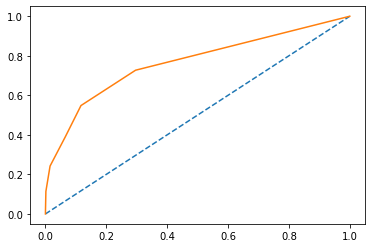

In [114]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn5.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.733


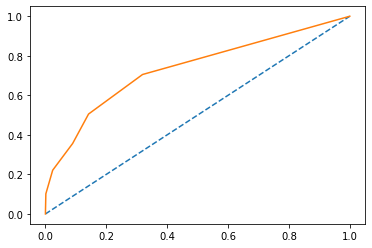

In [115]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn5.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Bulding KNN with SMOTE 

In [116]:
knn.fit(X_train_res, y_train_res)

# predict on train and test data set with balanced dataset
ytrain_predict_knnsm = knn.predict(X_train_res) # can compare with y_train
ytest_predict_knnsm = knn.predict(X_test) # can compare with y_test

In [117]:
print("confusion matrix for training dataset")
print(confusion_matrix(y_train_res, ytrain_predict_knnsm))

print("confusion matrix for testing dataset")
print(confusion_matrix(y_test, ytest_predict_knnsm))

confusion matrix for training dataset
[[4598 1958]
 [1589 4967]]
confusion matrix for testing dataset
[[1938  870]
 [ 150  420]]


In [118]:
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_knnsm))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      6556
           1       0.72      0.76      0.74      6556

    accuracy                           0.73     13112
   macro avg       0.73      0.73      0.73     13112
weighted avg       0.73      0.73      0.73     13112



In [119]:
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_knnsm))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      2808
           1       0.33      0.74      0.45       570

    accuracy                           0.70      3378
   macro avg       0.63      0.71      0.62      3378
weighted avg       0.83      0.70      0.73      3378



AUC score and ROC curve for training dataset
AUC: 0.832


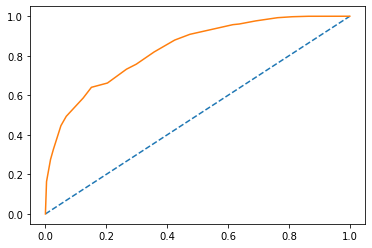

In [120]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.797


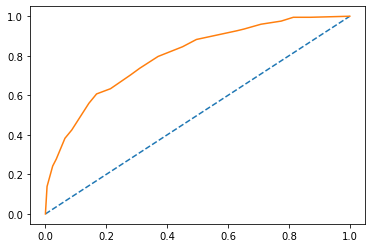

In [121]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Building Gaussian Naive Bayes 

In [122]:
#importing libraries to build NB model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# fitting NB model into training dataset
nb = GaussianNB()
nb.fit(X_train, y_train)

ytrain_predict_nb = nb.predict(X_train)
ytest_predict_nb = nb.predict(X_test)

In [123]:
print("Confusion matrix of train dataset")
print(confusion_matrix(y_train, ytrain_predict_nb))

print("Confusion matrix of test dataset")
print(confusion_matrix(y_test, ytest_predict_nb))

Confusion matrix of train dataset
[[ 994 5562]
 [  81 1245]]
Confusion matrix of test dataset
[[ 443 2365]
 [  27  543]]


In [124]:
print("Classification report of training dataset")
print(classification_report(y_train, ytrain_predict_nb))

Classification report of training dataset
              precision    recall  f1-score   support

           0       0.92      0.15      0.26      6556
           1       0.18      0.94      0.31      1326

    accuracy                           0.28      7882
   macro avg       0.55      0.55      0.28      7882
weighted avg       0.80      0.28      0.27      7882



In [125]:
print("Classification report of test dataset")
print(classification_report(y_test, ytest_predict_nb))   

Classification report of test dataset
              precision    recall  f1-score   support

           0       0.94      0.16      0.27      2808
           1       0.19      0.95      0.31       570

    accuracy                           0.29      3378
   macro avg       0.56      0.56      0.29      3378
weighted avg       0.82      0.29      0.28      3378



AUC score and ROC curve for training dataset
AUC: 0.730


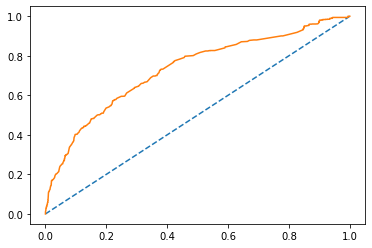

In [126]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.740


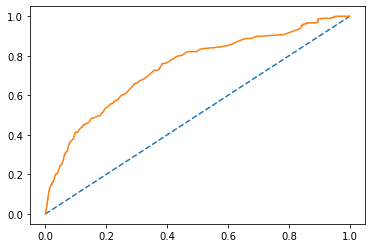

In [127]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Gausian Naive Bayes using SMOTE 

In [128]:
# fitting NB model into balanced training dataset
nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

ytrain_predict_nbsm = nb.predict(X_train_res)
ytest_predict_nbsm = nb.predict(X_test)

In [129]:
print("Confusion matrix of train dataset")
print(confusion_matrix(y_train_res, ytrain_predict_nbsm)) 

print("Confusion matrix of test dataset")
print(confusion_matrix(y_test, ytest_predict_nbsm))

Confusion matrix of train dataset
[[1075 5481]
 [ 366 6190]]
Confusion matrix of test dataset
[[ 478 2330]
 [  38  532]]


In [130]:
print("Classification report of train dataset")
print(classification_report(y_train_res, ytrain_predict_nbsm))

Classification report of train dataset
              precision    recall  f1-score   support

           0       0.75      0.16      0.27      6556
           1       0.53      0.94      0.68      6556

    accuracy                           0.55     13112
   macro avg       0.64      0.55      0.47     13112
weighted avg       0.64      0.55      0.47     13112



In [131]:
print("Classification report of test dataset")
print(classification_report(y_test, ytest_predict_nbsm))

Classification report of test dataset
              precision    recall  f1-score   support

           0       0.93      0.17      0.29      2808
           1       0.19      0.93      0.31       570

    accuracy                           0.30      3378
   macro avg       0.56      0.55      0.30      3378
weighted avg       0.80      0.30      0.29      3378



AUC score and ROC curve for training dataset
AUC: 0.736


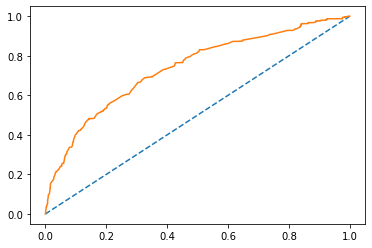

In [132]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.735


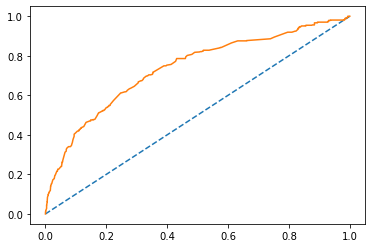

In [133]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Building Model using Bagging 

In [134]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)

from sklearn.ensemble import BaggingClassifier
Bagging=BaggingClassifier(base_estimator=dt,random_state=1)

Bagging.fit(X_train, y_train)

ytrain_predict_bagging = Bagging.predict(X_train)
ytest_predict_bagging = Bagging.predict(X_test)

In [135]:
print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_bagging))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_bagging))

confusion matrix for training dataset
[[6375  181]
 [ 803  523]]
confusion matrix for testing dataset
[[2682  126]
 [ 358  212]]


In [136]:
print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_bagging))

classification report for training dataset
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6556
           1       0.74      0.39      0.52      1326

    accuracy                           0.88      7882
   macro avg       0.82      0.68      0.72      7882
weighted avg       0.86      0.88      0.86      7882



In [137]:
print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_bagging))

classification report for testing dataset
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2808
           1       0.63      0.37      0.47       570

    accuracy                           0.86      3378
   macro avg       0.75      0.66      0.69      3378
weighted avg       0.84      0.86      0.84      3378



AUC score and ROC curve for training dataset
AUC: 0.867


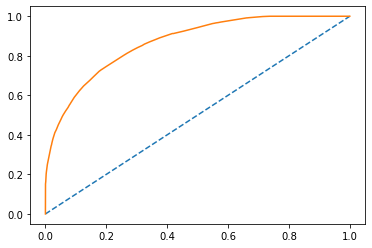

In [138]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.826


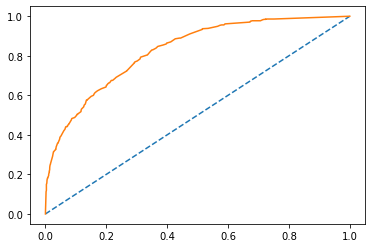

In [139]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Bagging using SMOTE 

In [140]:
Bagging.fit(X_train_res, y_train_res)

ytrain_predict_bagging_sm = Bagging.predict(X_train_res)
ytest_predict_bagging_sm= Bagging.predict(X_test)

In [141]:
print("confusion report for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_bagging_sm))

print("confusuion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_bagging_sm))

confusion report for training dataset
[[4994 1562]
 [1377 5179]]
confusuion matrix for testing dataset
[[2055  753]
 [ 154  416]]


In [142]:
print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_bagging_sm))

classification report for training dataset
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      6556
           1       0.77      0.79      0.78      6556

    accuracy                           0.78     13112
   macro avg       0.78      0.78      0.78     13112
weighted avg       0.78      0.78      0.78     13112



In [143]:
print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_bagging_sm))

classification report for testing dataset
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      2808
           1       0.36      0.73      0.48       570

    accuracy                           0.73      3378
   macro avg       0.64      0.73      0.65      3378
weighted avg       0.83      0.73      0.76      3378



AUC score and ROC curve for training dataset
AUC: 0.869


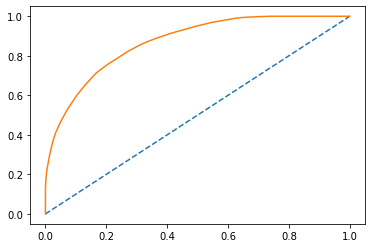

In [144]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.823


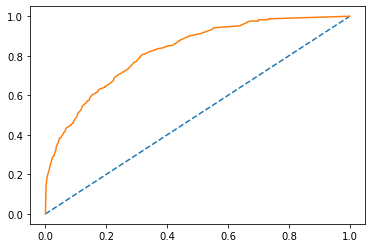

In [145]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Building Model using Random Forest 

In [146]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

ytrain_predict_rf = rf.predict(X_train)
ytest_predict_rf = rf.predict(X_test)

In [147]:
print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_rf))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_rf))

confusion matrix for training dataset
[[6370  186]
 [ 797  529]]
confusion matrix for testing dataset
[[2685  123]
 [ 364  206]]


In [148]:
print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_rf))

classification report for training dataset
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6556
           1       0.74      0.40      0.52      1326

    accuracy                           0.88      7882
   macro avg       0.81      0.69      0.72      7882
weighted avg       0.86      0.88      0.86      7882



In [149]:
print("classification report for testing datastet")
print(metrics.classification_report(y_test, ytest_predict_rf))

classification report for testing datastet
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2808
           1       0.63      0.36      0.46       570

    accuracy                           0.86      3378
   macro avg       0.75      0.66      0.69      3378
weighted avg       0.84      0.86      0.84      3378



AUC score and ROC curve for training dataset
AUC: 0.869


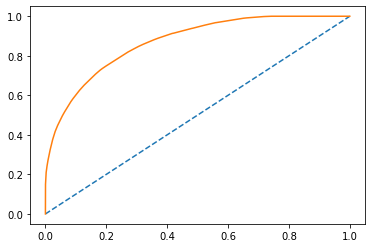

In [150]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.828


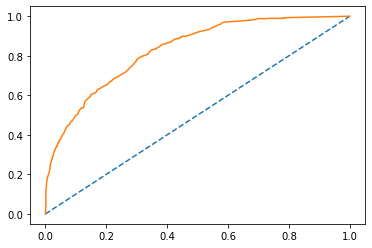

In [151]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Random Forest using SMOTE 

In [152]:
rf.fit(X_train_res, y_train_res)

ytrain_predict_rfsm = rf.predict(X_train_res)
ytest_predict_rfsm = rf.predict(X_test)

In [153]:
print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_rfsm))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_rfsm))

confusion matrix for training dataset
[[5064 1492]
 [1445 5111]]
confusion matrix for testing dataset
[[2098  710]
 [ 152  418]]


In [154]:
print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_rfsm))

classification report for training dataset
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      6556
           1       0.77      0.78      0.78      6556

    accuracy                           0.78     13112
   macro avg       0.78      0.78      0.78     13112
weighted avg       0.78      0.78      0.78     13112



In [155]:
print("classification report for testing dataste")
print(metrics.classification_report(y_test, ytest_predict_rfsm))

classification report for testing dataste
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2808
           1       0.37      0.73      0.49       570

    accuracy                           0.74      3378
   macro avg       0.65      0.74      0.66      3378
weighted avg       0.84      0.74      0.77      3378



AUC score and ROC curve for training dataset
AUC: 0.870


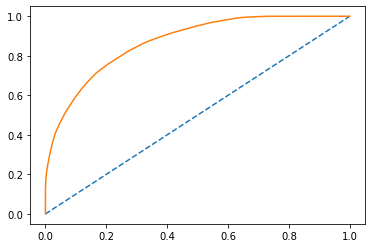

In [156]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = rf.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.823


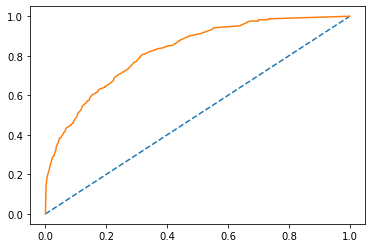

In [157]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Building Model using SVM 

In [158]:
from sklearn import svm
SVM = svm.SVC(probability=True)
SVM.fit(X_train, y_train)

ytrain_predict_SVM = SVM.predict(X_train)
ytest_predict_SVM = SVM.predict(X_test)

In [159]:
print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_SVM))

print("confusuon matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_SVM))

confusion matrix for training dataset
[[6429  127]
 [ 968  358]]
confusuon matrix for testing dataset
[[2727   81]
 [ 415  155]]


In [160]:
print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_SVM))

classification report for training dataset
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6556
           1       0.74      0.27      0.40      1326

    accuracy                           0.86      7882
   macro avg       0.80      0.63      0.66      7882
weighted avg       0.85      0.86      0.83      7882



In [161]:
print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_SVM))

classification report for testing dataset
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2808
           1       0.66      0.27      0.38       570

    accuracy                           0.85      3378
   macro avg       0.76      0.62      0.65      3378
weighted avg       0.83      0.85      0.83      3378



AUC score and ROC curve for training dataset
AUC: 0.753


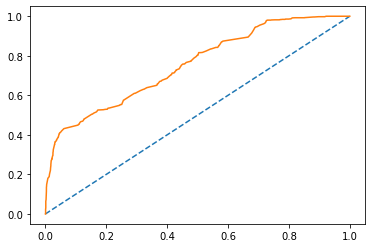

In [162]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = SVM.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.745


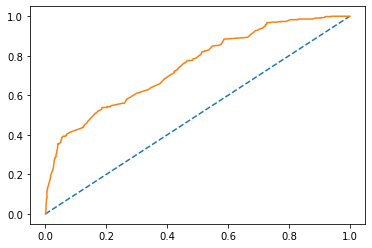

In [163]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = SVM.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### SVM Classifier using SMOTE 

In [164]:
SVM.fit(X_train_res, y_train_res)

ytrain_predict_SVMsm = SVM.predict(X_train_res)
ytest_predict_SVMsm = SVM.predict(X_test)

In [165]:
print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_SVMsm))

print("confusuon matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_SVMsm))

confusion matrix for training dataset
[[5110 1446]
 [1647 4909]]
confusuon matrix for testing dataset
[[2111  697]
 [ 173  397]]


In [166]:
print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_SVMsm))

classification report for training dataset
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      6556
           1       0.77      0.75      0.76      6556

    accuracy                           0.76     13112
   macro avg       0.76      0.76      0.76     13112
weighted avg       0.76      0.76      0.76     13112



In [167]:
print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_SVMsm))

classification report for testing dataset
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2808
           1       0.36      0.70      0.48       570

    accuracy                           0.74      3378
   macro avg       0.64      0.72      0.65      3378
weighted avg       0.83      0.74      0.77      3378



AUC score and ROC curve for training dataset
AUC: 0.806


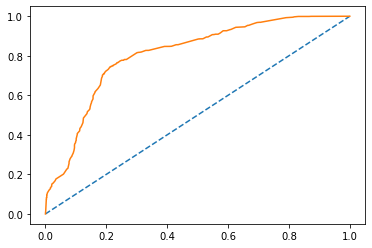

In [168]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = SVM.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.823


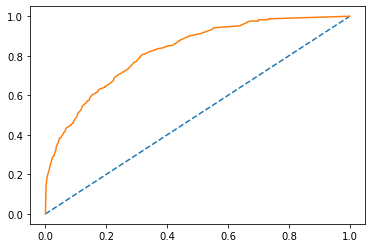

In [169]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [170]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Churn                    11260 non-null  int64
 1   Tenure                   11260 non-null  int64
 2   City_Tier                11260 non-null  int64
 3   CC_Contacted_LY          11260 non-null  int64
 4   Payment                  11260 non-null  int64
 5   Gender                   11260 non-null  int64
 6   Service_Score            11260 non-null  int64
 7   Account_user_count       11260 non-null  int64
 8   account_segment          11260 non-null  int64
 9   CC_Agent_Score           11260 non-null  int64
 10  Marital_Status           11260 non-null  int64
 11  rev_per_month            11260 non-null  int64
 12  Complain_ly              11260 non-null  int64
 13  rev_growth_yoy           11260 non-null  int64
 14  coupon_used_for_payment  11260 non-null  int64
 15  Da

In [199]:
from sklearn.cluster import KMeans

wss =[] 
for i in range(2,21):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_data)
    wss.append(KM.inertia_)

In [176]:
wss

[18749.461757077082,
 17130.39304915092,
 16195.326479190604,
 15152.14733029154,
 14504.330803668245,
 13925.814026817474,
 13585.79485341428,
 12958.82047607246,
 12776.11269435832]

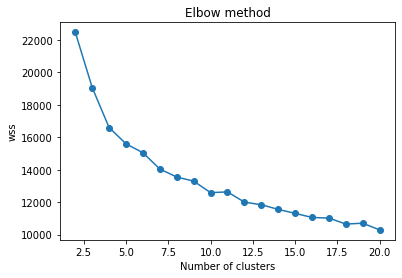

In [201]:
plt.plot(range(2,21), wss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wss')
plt.show()

In [206]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_data)

labels = kmeans.labels_
scaled_data["Clusters_Labels"] = labels

print("Count of each Cluster")
pd.DataFrame(scaled_data.groupby(["Clusters_Labels"]).count().loc[:,'Churn'])

Count of each Cluster


Churn
Clusters_Labels       
0                 2960
1                 3137
2                 1183
3                 1123
4                 1120
5                 1737

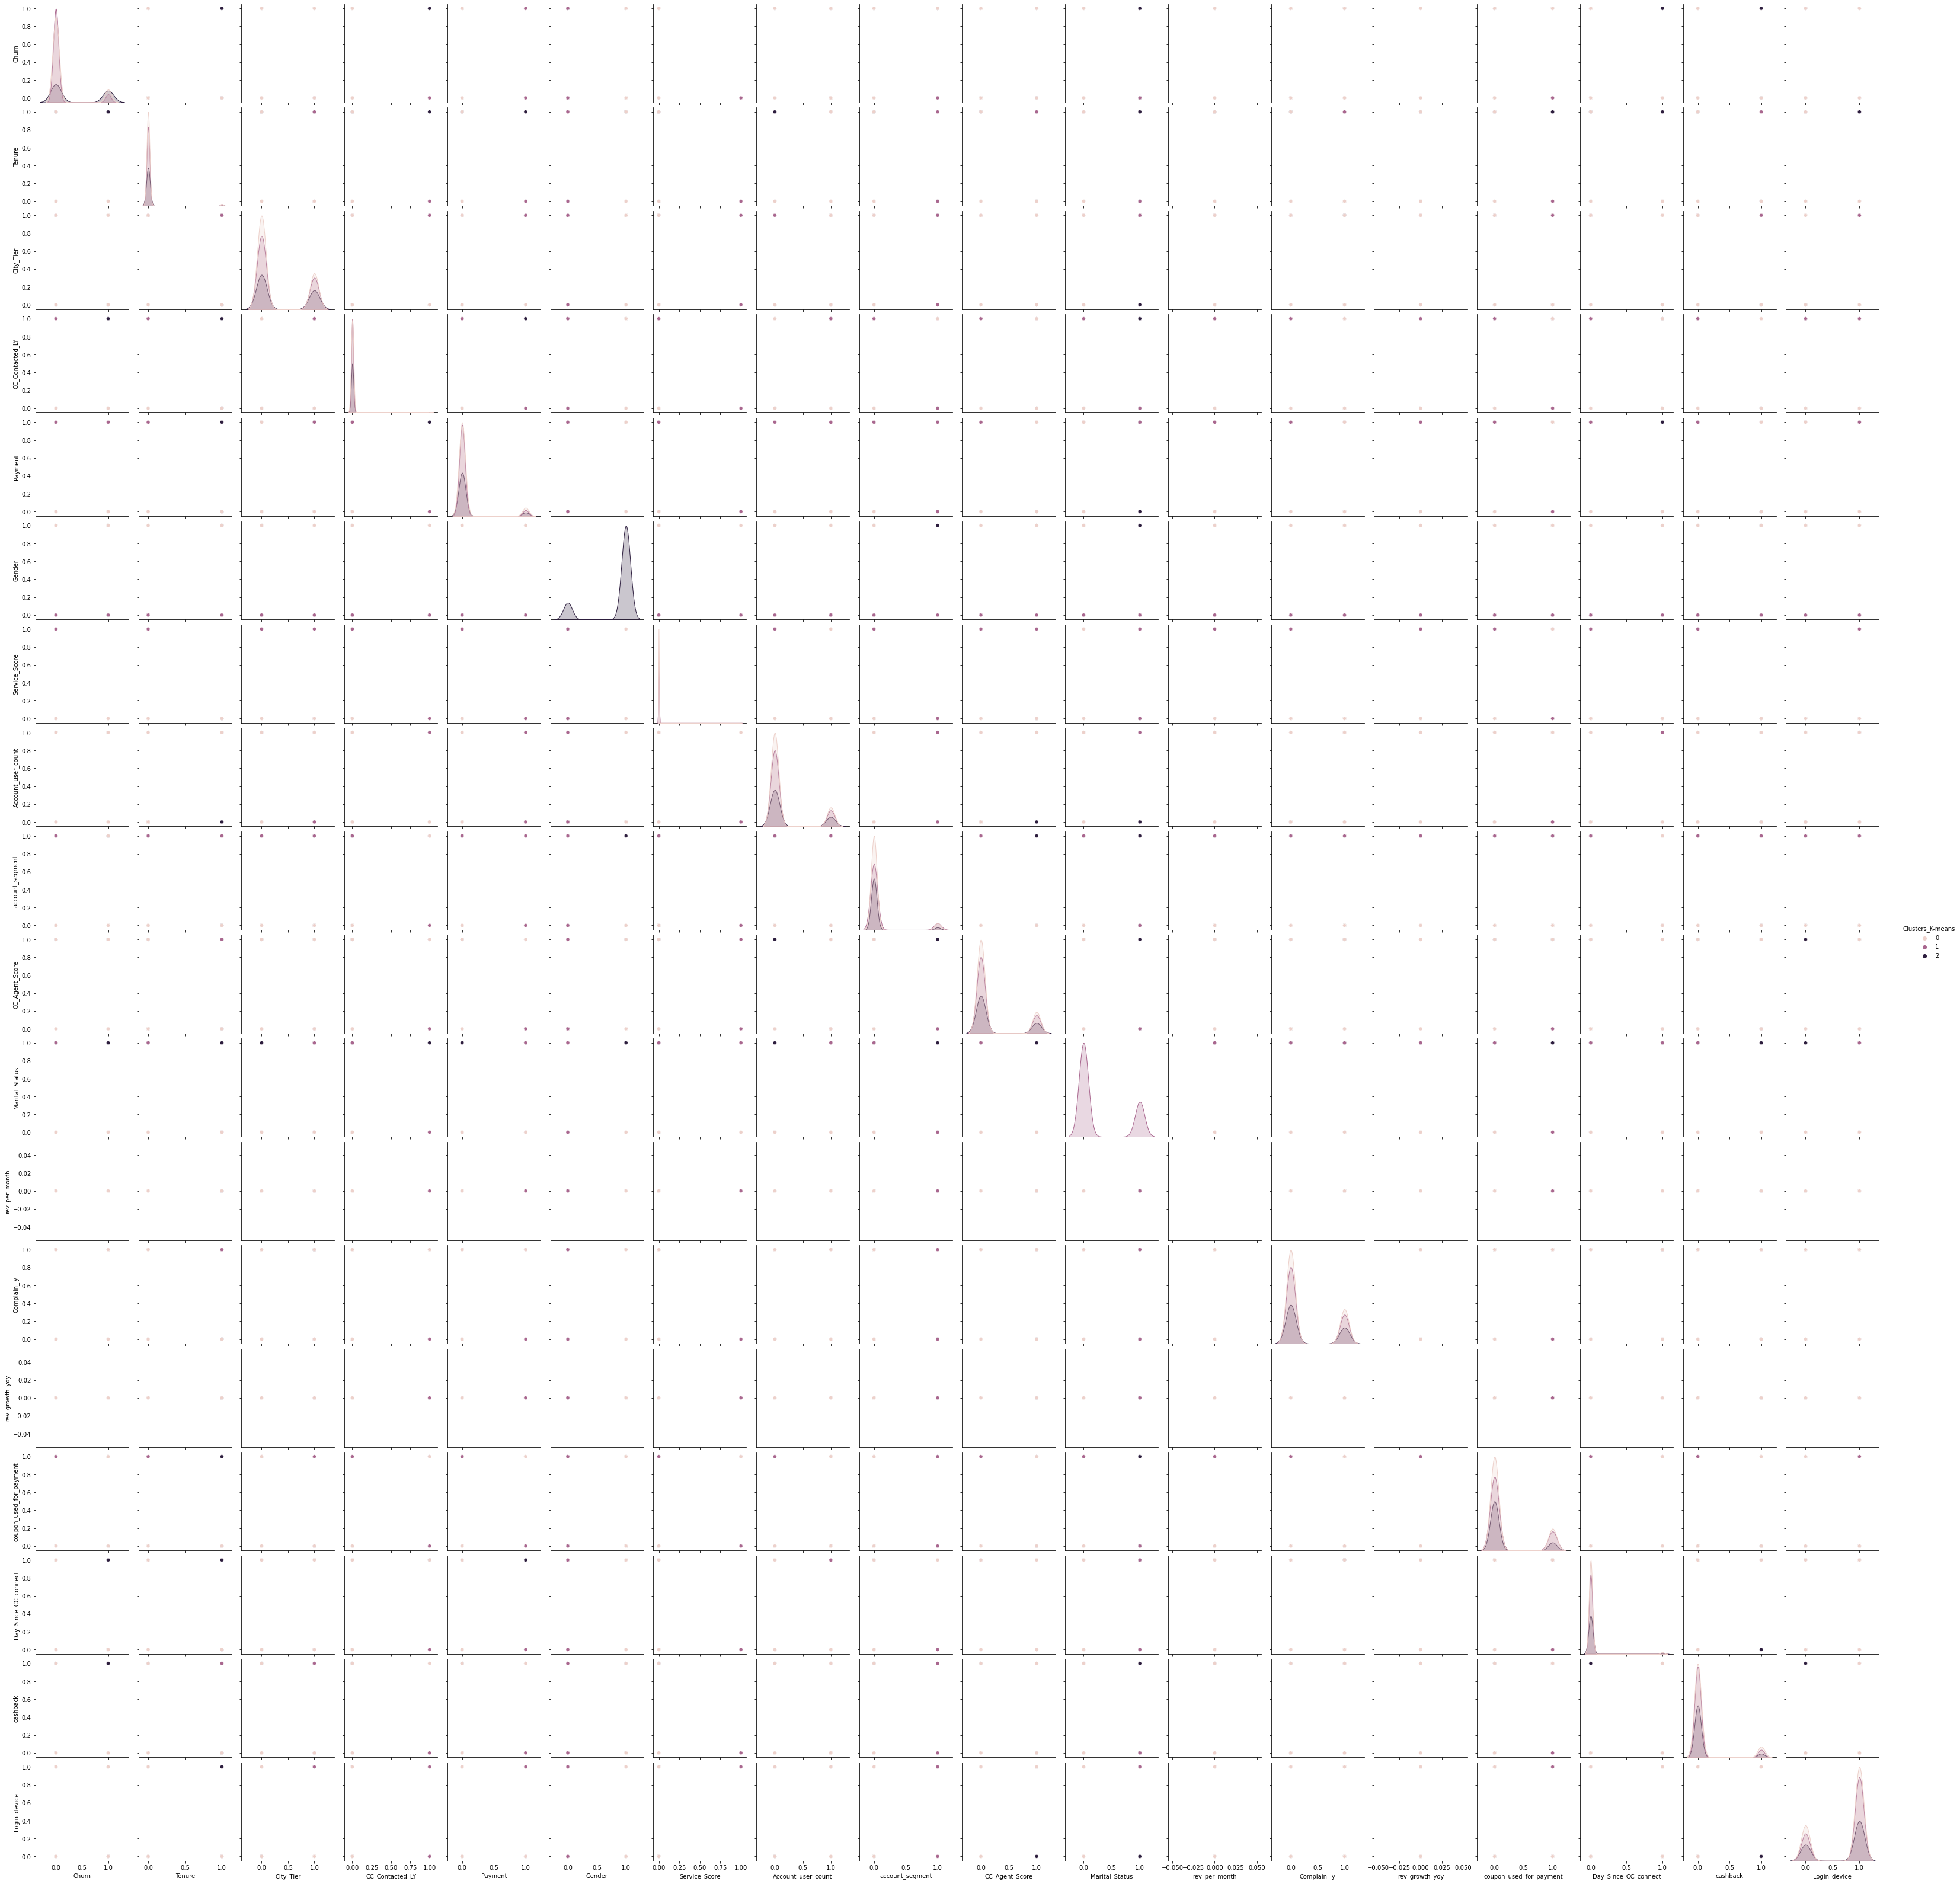

In [195]:
sns.pairplot(scaled_data,hue="Clusters_K-means")